# PART 2:
## Data Wrangling,Preprocessing And Transformation

Data wrangling is the process of cleaning, transforming, and preparing raw data into a format that is suitable for analysis

# Loading and Summarizing the Dataset: Apartments for Rent
This code loads a CSV dataset (apartments_for_rent_classified_10K.csv) into a DataFrame while handling any problematic rows by skipping them. The dataset is read with a specified encoding ('ISO-8859-1') and delimiter (';').

In [ ]:
import pandas as pd
# Skip problematic rows
df = pd.read_csv('apartments_for_rent_classified_10K.csv', encoding='ISO-8859-1', on_bad_lines='skip',delimiter=';')
print("Printing DataFrame Summary:\n")
print(df.info())
print("\n")
print("Statistical Overview:\n")
display(df.describe())

print("\nDataFrame Columns:\n")
print(df.columns)



Printing DataFrame Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 no

id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09  
50%      38.809800   -93.651600  1.577358e+09  
75%      41.349800   -82.209975  1.577359e+09  
max      61.594000   -70.191600  1.577362e+09


DataFrame Columns:

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


# Data cleaning:

This code preprocesses an apartment listings dataset by managing missing values, cleaning up redundant data, and analyzing outliers. It begins by dropping rows with excessive missing values (fewer than 18 non-null fields), then uses different imputation methods for remaining gaps: KNN for categorical columns, median for 'bathrooms,' 'bedrooms,' and 'longitude,' mean for 'latitude,' and mode for 'cityname' and 'state.' Duplicate rows are removed, and unnecessary columns such as 'price_display,' 'id,' 'fee,' and 'currency' are dropped. The code then generates box plots for numeric columns to visualize distributions and counts outliers using the IQR method. These steps ensure a consistent, clean dataset that’s ready for further analysis or modeling.


DataFrame after dropping rows with excessive missing values:



id                category  \
0     5668626895  housing/rent/apartment   
1     5664597177  housing/rent/apartment   
2     5668626833  housing/rent/apartment   
3     5659918074  housing/rent/apartment   
4     5668626759  housing/rent/apartment   
...          ...                     ...   
9995  5630240092  housing/rent/apartment   
9996  5668640983  housing/rent/apartment   
9997  5668643292  housing/rent/apartment   
9998  5668662559  housing/rent/apartment   
9999  5509132540  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body  \
0     This unit is located at second St NE, Uhland T...   
1     This unit is located at 814 Schutte Road, Evan...   
2     This unit is located at N Scott St, 14th St N,...   
3     This unit is located at 1717 12th Ave, Seattle...   
4     This unit is located at Washington Blvd, N Cle...   
...                                                 ...   
9995  This unit is located at 5407 Abbott Place - Ab...   
9996  This unit is located at 256 Las Entradas, Mont...   
9997  This unit is located at 9908 Bentcross Drive, ...   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   
9999  Square footage: 880 sq. feet, unit number: 150...   

                                              amenities  bathrooms  bedrooms  \
0                                                   NaN        NaN       0.0   
1                                                   NaN        NaN       1.0   
2                                                   NaN        1.0       0.0   
3                                                   NaN        1.0       0.0   
4                                                   NaN        NaN       0.0   
...                                                 ...        ...       ...   
9995                                                NaN        4.0       5.0   
9996                                                NaN        8.0       6.0   
9997                                                NaN        8.5       6.0   
9998  Basketball,Cable or Satellite,Doorman,Hot Tub,...        NaN       1.0   
9999                                     Gym,Patio/Deck        1.0       1.0   

     currency fee  has_photo  ... price_display  price_type square_feet  \
0         USD  No  Thumbnail  ...          $790     Monthly         101   
1         USD  No  Thumbnail  ...          $425     Monthly         106   
2         USD  No  Thumbnail  ...        $1,390     Monthly         107   
3         USD  No  Thumbnail  ...          $925     Monthly         116   
4         USD  No  Thumbnail  ...          $880     Monthly         125   
...       ...  ..        ...  ...           ...         ...         ...   
9995      USD  No  Thumbnail  ...        $6,000     Monthly        6300   
9996      USD  No  Thumbnail  ...       $25,000     Monthly        8716   
9997      USD  No  Thumbnail  ...       $11,000     Monthly       11318   
9998      USD  No  Thumbnail  ...        $4,790     Monthly       40000   
9999      USD  No         No  ...        $1,009     Monthly         880   

                        address       cityname state latitude longitude  \
0                           NaN     Washington    DC  38.9057  -76.9861   
1                814 Schutte Rd     Evansville    IN  3


Remaining null values in each column:

id                  0
category            0
title               0
body                0
amenities        3542
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4156
price               0
price_display       0
price_type          0
square_feet         0
address          3317
cityname           67
state              67
latitude            0
longitude           0
source              0
time                0
dtype: int64

Checking Skewness of Numerical Features:

Skewness of 'id': -1.004807294370049
Skewness of 'bathrooms': 2.05130308280455
Skewness of 'bedrooms': 1.1736423897581432
Skewness of 'price': 14.367517151261529
Skewness of 'square_feet': 22.93534917791203
Skewness of 'latitude': 0.28166156834300293
Skewness of 'longitude': -0.6658827327974338
Skewness of 'time': -0.9982022172032534

Imputing Missing Values:



id                category  \
0     5668626895  housing/rent/apartment   
1     5664597177  housing/rent/apartment   
2     5668626833  housing/rent/apartment   
3     5659918074  housing/rent/apartment   
4     5668626759  housing/rent/apartment   
...          ...                     ...   
9995  5630240092  housing/rent/apartment   
9996  5668640983  housing/rent/apartment   
9997  5668643292  housing/rent/apartment   
9998  5668662559  housing/rent/apartment   
9999  5509132540  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body amenities  bathrooms  \
0     This unit is located at second St NE, Uhland T...   Unknown        1.0   
1     This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2     This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3     This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4     This unit is located at Washington Blvd, N Cle...   Unknown        1.0   
...                                                 ...       ...        ...   
9995  This unit is located at 5407 Abbott Place - Ab...   Unknown        4.0   
9996  This unit is located at 256 Las Entradas, Mont...   Unknown        8.0   
9997  This unit is located at 9908 Bentcross Drive, ...   Unknown        8.5   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   Present        1.0   
9999  Square footage: 880 sq. feet, unit number: 150...   Present        1.0   

      bedrooms currency fee  has_photo  ... price_display  price_type  \
0          0.0      USD  No  Thumbnail  ...          $790     Monthly   
1          1.0      USD  No  Thumbnail  ...          $425     Monthly   
2          0.0      USD  No  Thumbnail  ...        $1,390     Monthly   
3          0.0      USD  No  Thumbnail  ...          $925     Monthly   
4          0.0      USD  No  Thumbnail  ...          $880     Monthly   
...        ...      ...  ..        ...  ...           ...         ...   
9995       5.0      USD  No  Thumbnail  ...        $6,000     Monthly   
9996       6.0      USD  No  Thumbnail  ...       $25,000     Monthly   
9997       6.0      USD  No  Thumbnail  ...       $11,000     Monthly   
9998       1.0      USD  No  Thumbnail  ...        $4,790     Monthly   
9999       1.0      USD  No         No  ...        $1,009     Monthly   

     square_feet                    address       cityname state latitude  \
0            101               Not Provided     Washington    DC  38.9057   
1            106             814 Schutte Rd     Evansville    IN  37.9680   
2            107               Not Provided      Arlington    VA  38.8910   
3            116           1717 12th Avenue        Seattle    WA  47.6160   
4            125               Not Provided      Arlington    VA  38.8738   
...          ...                        ...            ...   ...      ...   
9995        6300  5407 Abbott Place  Abbott          Edina    MN  44.9000   
9996        8716           256 Las Entradas      Montecito    CA  34.4331   
9997       11318          9908 Bentcross Dr        Potomac    MD  39.0287   
9998       40000               Not Provided       New York    NY  40.7716   
9999         880               Not Provided  Lawrenceville    GA  34.0072   

     longitud


Remaining null values in each column:

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

DataFrame shape after dropping duplicates:
 (10000, 22)

DataFrame head after dropping duplicates:



id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...   Unknown        1.0   
1  This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2  This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3  This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4  This unit is located at Washington Blvd, N Cle...   Unknown        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       0.0      USD  No  Thumbnail  ...          $790     Monthly   
1       1.0      USD  No  Thumbnail  ...          $425     Monthly   
2       0.0      USD  No  Thumbnail  ...        $1,390     Monthly   
3       0.0      USD  No  Thumbnail  ...          $925     Monthly   
4       0.0      USD  No  Thumbnail  ...          $880     Monthly   

  square_feet           address    cityname state latitude longitude  \
0         101      Not Provided  Washington    DC  38.9057  -76.9861   
1         106    814 Schutte Rd  Evansville    IN  37.9680  -87.6621   
2         107      Not Provided   Arlington    VA  38.8910  -77.0816   
3         116  1717 12th Avenue     Seattle    WA  47.6160 -122.3275   
4         125      Not Provided   Arlington    VA  38.8738  -77.1055   

      source        time  
0  RentLingo  1577359415  
1  RentLingo  1577017063  
2  RentLingo  1577359410  
3  RentLingo  1576667743  
4  RentLingo  1577359401  

[5 rows x 22 columns]


Contents of 'price_display' column before dropping:

0          $790
1          $425
2        $1,390
3          $925
4          $880
         ...   
9995     $6,000
9996    $25,000
9997    $11,000
9998     $4,790
9999     $1,009
Name: price_display, Length: 10000, dtype: object

DataFrame after attempting to drop 'price_display' column:



id                category  \
0     5668626895  housing/rent/apartment   
1     5664597177  housing/rent/apartment   
2     5668626833  housing/rent/apartment   
3     5659918074  housing/rent/apartment   
4     5668626759  housing/rent/apartment   
...          ...                     ...   
9995  5630240092  housing/rent/apartment   
9996  5668640983  housing/rent/apartment   
9997  5668643292  housing/rent/apartment   
9998  5668662559  housing/rent/apartment   
9999  5509132540  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body amenities  bathrooms  \
0     This unit is located at second St NE, Uhland T...   Unknown        1.0   
1     This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2     This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3     This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4     This unit is located at Washington Blvd, N Cle...   Unknown        1.0   
...                                                 ...       ...        ...   
9995  This unit is located at 5407 Abbott Place - Ab...   Unknown        4.0   
9996  This unit is located at 256 Las Entradas, Mont...   Unknown        8.0   
9997  This unit is located at 9908 Bentcross Drive, ...   Unknown        8.5   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   Present        1.0   
9999  Square footage: 880 sq. feet, unit number: 150...   Present        1.0   

      bedrooms currency fee  has_photo  ...  price  price_type square_feet  \
0          0.0      USD  No  Thumbnail  ...    790     Monthly         101   
1          1.0      USD  No  Thumbnail  ...    425     Monthly         106   
2          0.0      USD  No  Thumbnail  ...   1390     Monthly         107   
3          0.0      USD  No  Thumbnail  ...    925     Monthly         116   
4          0.0      USD  No  Thumbnail  ...    880     Monthly         125   
...        ...      ...  ..        ...  ...    ...         ...         ...   
9995       5.0      USD  No  Thumbnail  ...   6000     Monthly        6300   
9996       6.0      USD  No  Thumbnail  ...  25000     Monthly        8716   
9997       6.0      USD  No  Thumbnail  ...  11000     Monthly       11318   
9998       1.0      USD  No  Thumbnail  ...   4790     Monthly       40000   
9999       1.0      USD  No         No  ...   1009     Monthly         880   

                        address       cityname state latitude  longitude  \
0                  Not Provided     Washington    DC  38.9057   -76.9861   
1                814 Schutte Rd     Evansville    IN  37.9680   -87.6621   
2                  Not Provided      Arlington    VA  38.8910   -77.0816   
3              1717 12th Avenue        Seattle    WA  47.6160  -122.3275   
4                  Not Provided      Arlington    VA  38.8738   -77.1055   
...                         ...            ...   ...      ...        ...   
9995  5407 Abbott Place  Abbott          Edina    MN  44.9000   -93.3233   
9996           256 Las Entradas      Montecito    CA  34.4331  -119.6331   
9997          9908 Bentcross Dr        Potomac    MD  39.0287   -77.2409   
9998               Not Provided       New York    NY  40.7716   -73.9876   
9999               Not Provided  Lawrencev


Contents of 'id' column before dropping:

0       5668626895
1       5664597177
2       5668626833
3       5659918074
4       5668626759
           ...    
9995    5630240092
9996    5668640983
9997    5668643292
9998    5668662559
9999    5509132540
Name: id, Length: 10000, dtype: int64

DataFrame after attempting to drop 'id' column:



category  \
0     housing/rent/apartment   
1     housing/rent/apartment   
2     housing/rent/apartment   
3     housing/rent/apartment   
4     housing/rent/apartment   
...                      ...   
9995  housing/rent/apartment   
9996  housing/rent/apartment   
9997  housing/rent/apartment   
9998  housing/rent/apartment   
9999  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body amenities  bathrooms  \
0     This unit is located at second St NE, Uhland T...   Unknown        1.0   
1     This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2     This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3     This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4     This unit is located at Washington Blvd, N Cle...   Unknown        1.0   
...                                                 ...       ...        ...   
9995  This unit is located at 5407 Abbott Place - Ab...   Unknown        4.0   
9996  This unit is located at 256 Las Entradas, Mont...   Unknown        8.0   
9997  This unit is located at 9908 Bentcross Drive, ...   Unknown        8.5   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   Present        1.0   
9999  Square footage: 880 sq. feet, unit number: 150...   Present        1.0   

      bedrooms currency fee  has_photo   pets_allowed  price price_type  \
0          0.0      USD  No  Thumbnail  Not Specified    790    Monthly   
1          1.0      USD  No  Thumbnail  Not Specified    425    Monthly   
2          0.0      USD  No  Thumbnail  Not Specified   1390    Monthly   
3          0.0      USD  No  Thumbnail  Not Specified    925    Monthly   
4          0.0      USD  No  Thumbnail  Not Specified    880    Monthly   
...        ...      ...  ..        ...            ...    ...        ...   
9995       5.0      USD  No  Thumbnail  Not Specified   6000    Monthly   
9996       6.0      USD  No  Thumbnail  Not Specified  25000    Monthly   
9997       6.0      USD  No  Thumbnail  Not Specified  11000    Monthly   
9998       1.0      USD  No  Thumbnail  Not Specified   4790    Monthly   
9999       1.0      USD  No         No  Not Specified   1009    Monthly   

      square_feet                    address       cityname state  latitude  \
0             101               Not Provided     Washington    DC   38.9057   
1             106             814 Schutte Rd     Evansville    IN   37.9680   
2             107               Not Provided      Arlington    VA   38.8910   
3             116           1717 12th Avenue        Seattle    WA   47.6160   
4             125               Not Provided      Arlington    VA   38.8738   
...           ...                        ...            ...   ...       ...   
9995         6300  5407 Abbott Place  Abbott          Edina    MN   44.9000   
9996         8716           256 Las Entradas      Montecito    CA   34.4331   
9997        11318          9908 Bentcross Dr        Potomac    MD   39.0287   
9998        40000               Not Provided       New York    NY   40.7716   
9999          880               Not Provided  Lawrenceville    GA   34.0072   

      longitude        source        time  
0      -76.9861     RentLingo  1577359415  
1      -87.6621     RentLin


DataFrame after attempting to drop 'fee' and 'currency' columns:



category  \
0     housing/rent/apartment   
1     housing/rent/apartment   
2     housing/rent/apartment   
3     housing/rent/apartment   
4     housing/rent/apartment   
...                      ...   
9995  housing/rent/apartment   
9996  housing/rent/apartment   
9997  housing/rent/apartment   
9998  housing/rent/apartment   
9999  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body amenities  bathrooms  \
0     This unit is located at second St NE, Uhland T...   Unknown        1.0   
1     This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2     This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3     This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4     This unit is located at Washington Blvd, N Cle...   Unknown        1.0   
...                                                 ...       ...        ...   
9995  This unit is located at 5407 Abbott Place - Ab...   Unknown        4.0   
9996  This unit is located at 256 Las Entradas, Mont...   Unknown        8.0   
9997  This unit is located at 9908 Bentcross Drive, ...   Unknown        8.5   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   Present        1.0   
9999  Square footage: 880 sq. feet, unit number: 150...   Present        1.0   

      bedrooms  has_photo   pets_allowed  price price_type  square_feet  \
0          0.0  Thumbnail  Not Specified    790    Monthly          101   
1          1.0  Thumbnail  Not Specified    425    Monthly          106   
2          0.0  Thumbnail  Not Specified   1390    Monthly          107   
3          0.0  Thumbnail  Not Specified    925    Monthly          116   
4          0.0  Thumbnail  Not Specified    880    Monthly          125   
...        ...        ...            ...    ...        ...          ...   
9995       5.0  Thumbnail  Not Specified   6000    Monthly         6300   
9996       6.0  Thumbnail  Not Specified  25000    Monthly         8716   
9997       6.0  Thumbnail  Not Specified  11000    Monthly        11318   
9998       1.0  Thumbnail  Not Specified   4790    Monthly        40000   
9999       1.0         No  Not Specified   1009    Monthly          880   

                        address       cityname state  latitude  longitude  \
0                  Not Provided     Washington    DC   38.9057   -76.9861   
1                814 Schutte Rd     Evansville    IN   37.9680   -87.6621   
2                  Not Provided      Arlington    VA   38.8910   -77.0816   
3              1717 12th Avenue        Seattle    WA   47.6160  -122.3275   
4                  Not Provided      Arlington    VA   38.8738   -77.1055   
...                         ...            ...   ...       ...        ...   
9995  5407 Abbott Place  Abbott          Edina    MN   44.9000   -93.3233   
9996           256 Las Entradas      Montecito    CA   34.4331  -119.6331   
9997          9908 Bentcross Dr        Potomac    MD   39.0287   -77.2409   
9998               Not Provided       New York    NY   40.7716   -73.9876   
9999               Not Provided  Lawrenceville    GA   34.0072   -84.0034   

            source        time  
0        RentLingo  1577359415  
1        RentLingo  1577017063  
2        RentLingo  1577359410  
3      


Plotting numeric boxplot



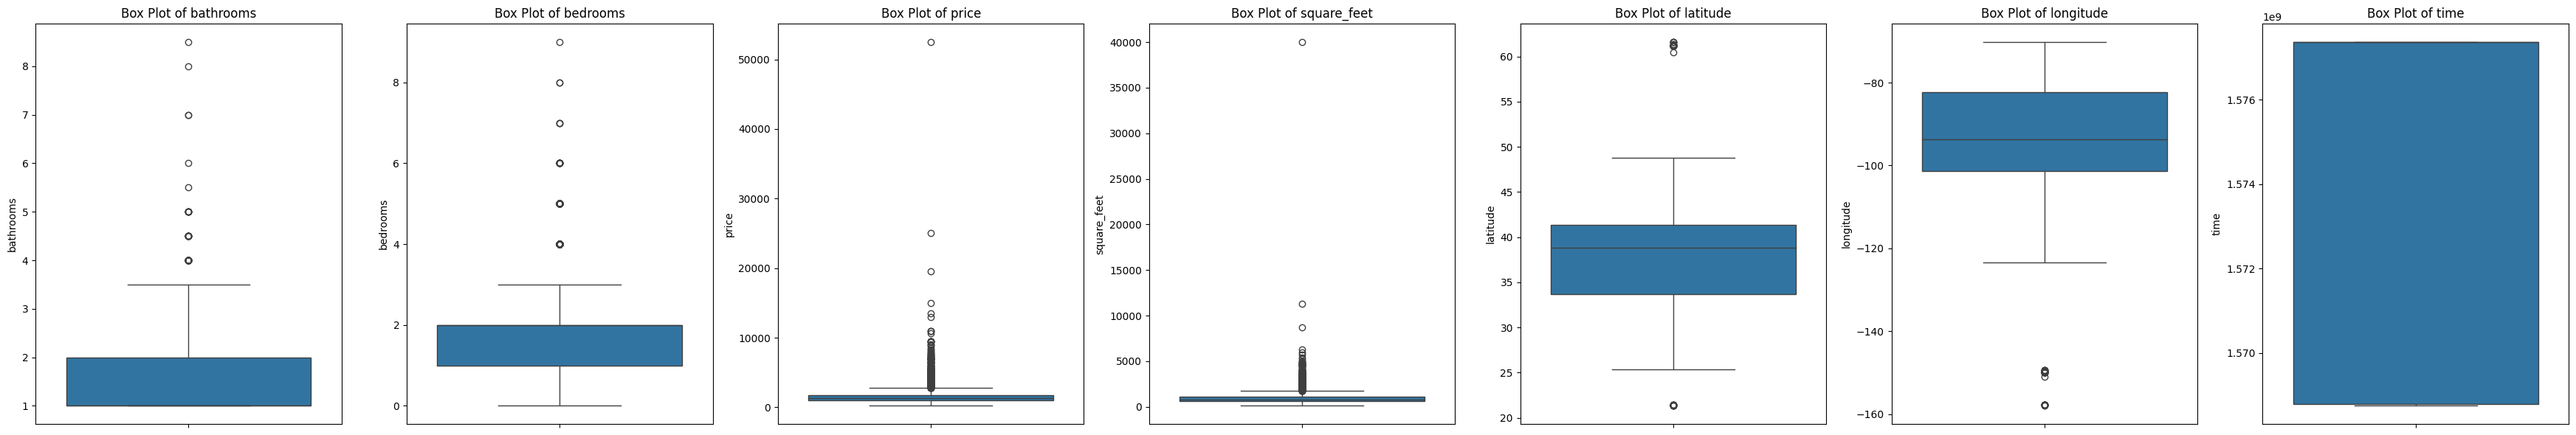


Imputing outliers using medians

Outlier Counts for Each Column:
{'bathrooms': 72, 'bedrooms': 514, 'price': 618, 'square_feet': 622, 'latitude': 56, 'longitude': 56, 'time': 0}


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Define plot_numeric_boxplots function after importing the required libraries
def plot_numeric_boxplots(df):
    """
    Plots box plots for all numeric columns (int and float types) in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing data to plot.
    """
    # Select only columns with int and float data types
    numeric_data = df.select_dtypes(include=['int64', 'float64'])

    # Set up the figure with a suitable size
    plt.figure(figsize=(5 * len(numeric_data.columns), 6))

    # Loop through each numeric column and create a box plot
    for i, col in enumerate(numeric_data.columns, 1):
        plt.subplot(1, len(numeric_data.columns), i)
        sns.boxplot(y=numeric_data[col])
        plt.title(f'Box Plot of {col}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Your original code starts here
df_dropT = df.dropna(axis=0, thresh=18)  # Drop rows with less than 18 non-null values
print("\nDataFrame after dropping rows with excessive missing values:\n")
display(df_dropT)

print("\nRemaining null values in each column:\n")
print(df_dropT.isnull().sum())

print("\nChecking Skewness of Numerical Features:\n")

def check_skewness(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Loop through each numerical column and calculate skewness
    for col in numerical_cols:
        skew_value = df[col].skew()
        print(f"Skewness of '{col}': {skew_value}")

check_skewness(df)

print("\nImputing Missing Values:\n")

def impute_missing_values(df):
    # KNN Imputer for high missing values
    knn_imputer = KNNImputer(n_neighbors=5)

    # 1. Impute 'amenities' using KNN
    if 'amenities' in df.columns:
        df['amenities'] = df['amenities'].fillna('Unknown')
        amenities_numeric = df['amenities'].apply(lambda x: 1 if x != 'Unknown' else 0).values.reshape(-1, 1)
        df['amenities'] = knn_imputer.fit_transform(amenities_numeric).flatten()
        df['amenities'] = df['amenities'].apply(lambda x: 'Present' if x >= 0.5 else 'Unknown')  # Convert back

    # 2. Impute 'bathrooms' and 'bedrooms' with median
    for col in ['bathrooms', 'bedrooms', 'longitude']:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            median_imputer = SimpleImputer(strategy='median')
            df[col] = median_imputer.fit_transform(df[[col]]).flatten()

    # 3. Impute 'pets_allowed' using KNN
    if 'pets_allowed' in df.columns:
        df['pets_allowed'] = df['pets_allowed'].fillna('Not Specified')
        pets_numeric = df['pets_allowed'].apply(lambda x: 1 if x != 'Not Specified' else 0).values.reshape(-1, 1)
        df['pets_allowed'] = knn_imputer.fit_transform(pets_numeric).flatten()
        df['pets_allowed'] = df['pets_allowed'].apply(lambda x: 'Allowed' if x >= 0.5 else 'Not Specified')  # Convert back

    # 4. Impute 'address' if necessary
    if 'address' in df.columns:
        df['address'] = df['address'].fillna('Not Provided')

    # 5. Impute 'cityname' and 'state' with mode
    for col in ['cityname', 'state']:
        if col in df.columns:
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df[col] = mode_imputer.fit_transform(df[[col]].astype(str)).flatten()

    # 6. Impute 'latitude' and 'longitude' with mean
    for col in ['latitude']:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            mean_imputer = SimpleImputer(strategy='mean')
            df[col] = mean_imputer.fit_transform(df[[col]]).flatten()

    return df

df = impute_missing_values(df)
display(df)
print("\nRemaining null values in each column:\n")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print("\nDataFrame shape after dropping duplicates:\n", df.shape)
print("\nDataFrame head after dropping duplicates:\n")
display(df.head())

# Print and drop 'price_display' if it exists
if 'price_display' in df.columns:
    print("\nContents of 'price_display' column before dropping:\n")
    print(df['price_display'])
df = df.drop(columns=['price_display'], errors='ignore')
print("\nDataFrame after attempting to drop 'price_display' column:\n")
display(df)

# Print and drop 'id' if it exists
if 'id' in df.columns:
    print("\nContents of 'id' column before dropping:\n")
    print(df['id'])
df = df.drop(columns=['id'], errors='ignore')
print("\nDataFrame after attempting to drop 'id' column:\n")
display(df)

# Drop 'fee' and 'currency' columns if they exist, without printing contents
df.drop(columns=['fee', 'currency'], inplace=True, errors='ignore')
print("\nDataFrame after attempting to drop 'fee' and 'currency' columns:\n")
display(df)

print("\nPlotting numeric boxplot\n")
plot_numeric_boxplots(df)

print("\nImputing outliers using medians\n")

def count_outliers(df):
    """
    Counts the number of outliers in each numerical column (int and float types) of the given DataFrame
    based on the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary where keys are column names and values are the count of outliers in each column.
    """
    outlier_counts = {}

    # Loop through each numeric column in the DataFrame
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers in the column
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]

    return outlier_counts

outlier_counts = count_outliers(df)
print("Outlier Counts for Each Column:")
print(outlier_counts)


# Data transformation:
This code preprocesses an apartment listing dataset by applying log and Box-Cox transformations to reduce skewness, imputing outliers using the median via the IQR method, and converting the 'has_photo' column to numeric values for balancing. A RandomOverSampler then balances the classes in 'has_photo,' and value counts for categorical columns (like 'amenities,' 'pets_allowed,' and 'price_type') are displayed to assess their distribution, preparing the dataset for analysis and modeling.

Applied log transformation to 'bathrooms', skewness: 2.0563057534974494
Applied log transformation to 'bedrooms', skewness: 1.1734056012808853

Box-Cox Transformation of a Column

Fitted lambda for Box-Cox transformation of 'price': -0.3906471752287337


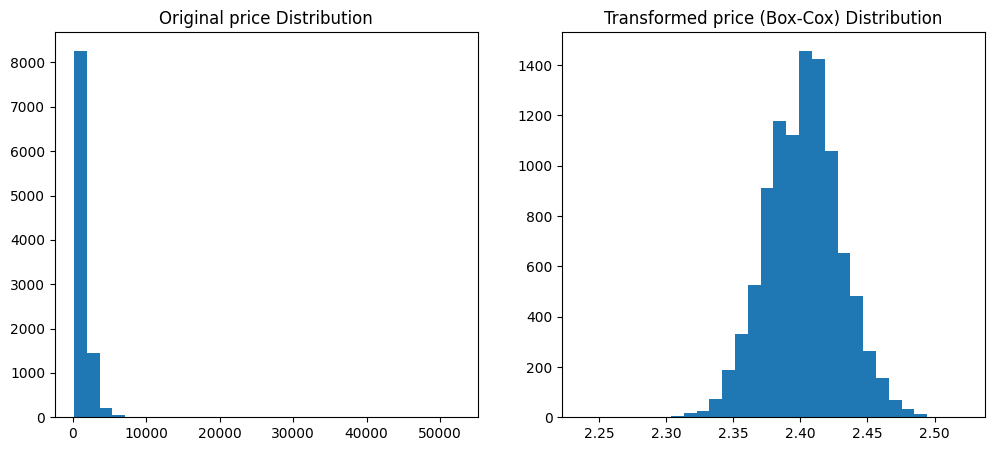

bathrooms - Outliers imputed with median: 1.0
bedrooms - Outliers imputed with median: 2.0
price - Outliers imputed with median: 1270.0
latitude - Outliers imputed with median: 38.8077
longitude - Outliers imputed with median: -93.6516
square_feet - Outliers imputed with median: 802.0
bathrooms_log - Outliers imputed with median: 0.6931471805599453
bedrooms_log - Outliers imputed with median: 1.0986122886681096
price_boxcox - Outliers imputed with median: 2.4029184723118506

Modified DataFrame with outliers imputed:


category  \
0     housing/rent/apartment   
1     housing/rent/apartment   
2     housing/rent/apartment   
3     housing/rent/apartment   
4     housing/rent/apartment   
...                      ...   
9995  housing/rent/apartment   
9996  housing/rent/apartment   
9997  housing/rent/apartment   
9998  housing/rent/apartment   
9999  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9995                 Five BR 5407 Abbott Place - Abbott   
9996                            Six BR 256 Las Entradas   
9997                        Six BR 9908 Bentcross Drive   
9998                        One BR in New York NY 10069   
9999         Beautiful Lawrenceville Apartment for rent   

                                                   body amenities  bathrooms  \
0     This unit is located at second St NE, Uhland T...   Unknown        1.0   
1     This unit is located at 814 Schutte Road, Evan...   Unknown        1.0   
2     This unit is located at N Scott St, 14th St N,...   Unknown        1.0   
3     This unit is located at 1717 12th Ave, Seattle...   Unknown        1.0   
4     This unit is located at Washington Blvd, N Cle...   Unknown        1.0   
...                                                 ...       ...        ...   
9995  This unit is located at 5407 Abbott Place - Ab...   Unknown        1.0   
9996  This unit is located at 256 Las Entradas, Mont...   Unknown        1.0   
9997  This unit is located at 9908 Bentcross Drive, ...   Unknown        1.0   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   Present        1.0   
9999  Square footage: 880 sq. feet, unit number: 150...   Present        1.0   

      bedrooms  has_photo   pets_allowed   price price_type  ...  \
0          0.0  Thumbnail  Not Specified   790.0    Monthly  ...   
1          1.0  Thumbnail  Not Specified   425.0    Monthly  ...   
2          0.0  Thumbnail  Not Specified  1390.0    Monthly  ...   
3          0.0  Thumbnail  Not Specified   925.0    Monthly  ...   
4          0.0  Thumbnail  Not Specified   880.0    Monthly  ...   
...        ...        ...            ...     ...        ...  ...   
9995       2.0  Thumbnail  Not Specified  1270.0    Monthly  ...   
9996       2.0  Thumbnail  Not Specified  1270.0    Monthly  ...   
9997       2.0  Thumbnail  Not Specified  1270.0    Monthly  ...   
9998       1.0  Thumbnail  Not Specified  1270.0    Monthly  ...   
9999       1.0         No  Not Specified  1009.0    Monthly  ...   

                        address       cityname state latitude  longitude  \
0                  Not Provided     Washington    DC  38.9057   -76.9861   
1                814 Schutte Rd     Evansville    IN  37.9680   -87.6621   
2                  Not Provided      Arlington    VA  38.8910   -77.0816   
3              1717 12th Avenue        Seattle    WA  47.6160  -122.3275   
4                  Not Provided      Arlington    VA  38.8738   -77.1055   
...                         ...            ...   ...      ...        ...   
9995  5407 Abbott Place  Abbott          Edina    MN  44.9000   -93.3233   
9996           256 Las Entradas      Montecito    CA  34.4331  -119.6331   
9997          9908 Bentcross Dr        Potomac    MD  39.0287   -77.2409   
9998               Not Provided       New York    NY  40.7716   -73.9876   
9999               Not Provided  Lawrenceville    GA  34.0072   -84.0034   

            source        time  bathrooms_log  bedrooms_log  price_boxcox  
0        RentLingo  1577359415       0.693147      1.098612      2.370940  
1        RentLingo  1577017063       0.693147      0.693147      2.402918  
2      

Class distribution after balancing:
 has_photo
0    8907
1    8907
2    8907
Name: count, dtype: int64
Displaying value counts for 'has_photo' column:

has_photo
0    8907
1     909
2     184
Name: count, dtype: int64

Displaying value counts for 'amenities' column:

amenities
Present    6451
Unknown    3549
Name: count, dtype: int64

Displaying value counts for 'pets_allowed' column:

pets_allowed
Allowed          5837
Not Specified    4163
Name: count, dtype: int64

Displaying value counts for 'price_type' column:

price_type
Monthly           9998
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Function for log transformation
def log_transform_selected(df, columns, target_column):
    new_columns = []  # To store names of new columns created

    for col in columns:
        if col != target_column and col in df.columns:
            skewness = df[col].skew()
            new_col = col + '_log'
            df[new_col] = np.log1p(df[col])  # Apply log transformation
            new_columns.append(new_col)
            print(f"Applied log transformation to '{col}', skewness: {skewness}")

    return df, new_columns

# Specify the columns to apply log transformation to
columns_to_transform = ['bathrooms', 'bedrooms']

# Apply log transformation to selected columns
df_transformed, transformed_columns = log_transform_selected(df, columns_to_transform, target_column='square_feet')

print("\nBox-Cox Transformation of a Column\n")

# Function for Box-Cox transformation
def box_cox_transform_single(df, column_name):
    if (df[column_name] <= 0).any():
        df[column_name] = df[column_name] + 1 - df[column_name].min()

    transformed_data, fitted_lambda = stats.boxcox(df[column_name])
    new_col = column_name + '_boxcox'
    df[new_col] = transformed_data
    return df, fitted_lambda, new_col

# Apply Box-Cox transformation to the 'price' column
df, lambda_boxcox, price_boxcox_col = box_cox_transform_single(df, 'price')
print(f"Fitted lambda for Box-Cox transformation of 'price': {lambda_boxcox}")

# Plot before and after transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original price Distribution')
plt.hist(df['price'], bins=30)

plt.subplot(1, 2, 2)
plt.title('Transformed price (Box-Cox) Distribution')
plt.hist(df[price_boxcox_col], bins=30)
plt.show()

# Define columns for outlier imputation
original_columns = ['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude', 'square_feet']
log_transformed_columns = transformed_columns + [price_boxcox_col]  # Add only if created

# Function to impute outliers using the IQR method
def impute_outliers(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median = df[col].median()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
            print(f"{col} - Outliers imputed with median: {median}")
        else:
            print(f"Column '{col}' not found in DataFrame; skipping.")

    return df

# Impute outliers in original and log-transformed columns
df = impute_outliers(df, original_columns + log_transformed_columns)
print("\nModified DataFrame with outliers imputed:")
display(df)

# Step 1: Prepare the data for balancing
# Encode the 'has_photo' variable to numerical values for processing
df['has_photo'] = df['has_photo'].map({'Thumbnail': 0, 'Yes': 1, 'No': 2})

# Step 2: Separate features and target variable
X = df.drop('has_photo', axis=1)  # Features
y = df['has_photo']                # Target variable

# Step 3: Create a RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Step 4: Apply the oversampler to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Step 5: Combine the resampled features and target variable back into a DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['has_photo'] = y_resampled

# Step 6: Show the class distribution after balancing
class_distribution = df_balanced['has_photo'].value_counts()
print("Class distribution after balancing:\n", class_distribution)

# Displaying value counts for 'has_photo' column
print("Displaying value counts for 'has_photo' column:\n")
value_counts = df['has_photo'].value_counts()
print(value_counts)

# Displaying value counts for additional columns
print("\nDisplaying value counts for 'amenities' column:\n")
value_counts = df['amenities'].value_counts()
print(value_counts)

print("\nDisplaying value counts for 'pets_allowed' column:\n")
value_counts = df['pets_allowed'].value_counts()
print(value_counts)

print("\nDisplaying value counts for 'price_type' column:\n")
value_counts = df['price_type'].value_counts()
print(value_counts)


# Encoding and Balancing Techniques:
This code provides a streamlined data preprocessing pipeline for apartment listings. Rare categories are merged for stability, and skewness in numerical columns is corrected with a Power Transformer. Frequency encoding transforms categorical columns based on occurrence, while Unix timestamps are converted to useful datetime features. To balance target variables, random oversampling is applied to columns like `price_type`, `pets_allowed`, and `amenities`, with mappings set up before balancing. Unnecessary columns are dropped, resulting in a balanced, transformed, and encoded dataset ready for analysis or modeling.

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import PowerTransformer

# Function to merge rare categories in a column
def merge_rare_categories(df, column, threshold=0.05):
    """
    Merges rare categories in a specified column based on a frequency threshold.
    """
    print(f"\nBefore merging rare categories in '{column}':")
    print(df[column].value_counts())

    frequency_map = df[column].value_counts(normalize=True)
    rare_categories = frequency_map[frequency_map < threshold].index
    df[column] = df[column].replace(rare_categories, 'Other')

    print(f"\nAfter merging rare categories in '{column}':")
    print(df[column].value_counts())
    return df  # Ensure the DataFrame is returned

# Function to handle skewness in numeric columns
def handle_skewness(df, columns):
    """
    Checks skewness in numeric columns and applies a log or Box-Cox transformation to reduce it if needed.
    """
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)

    for col in columns:
        skewness = df[col].skew()
        print(f"Skewness of '{col}': {skewness}")
        if abs(skewness) > 1:  # Threshold for considering transformation
            df[[col]] = transformer.fit_transform(df[[col]])
            print(f"Applied transformation to reduce skewness in '{col}'.")
        else:
            print(f"No transformation applied to '{col}' as skewness is acceptable.")

    print(f"\nAfter skewness handling:")
    print(df[columns].head())
    return df  # Ensure the DataFrame is returned

# Function to apply frequency encoding to a column
def frequency_encode(df, column):
    """
    Applies frequency encoding to a specified categorical column.
    """
    frequency_map = df[column].value_counts(normalize=True)
    df[column + '_encoded'] = df[column].map(frequency_map)

    print(f"\nAfter frequency encoding on '{column}':")
    print(df[[column, column + '_encoded']].head())
    return df  # Ensure the DataFrame is returned

# Function to preprocess multiple columns
def preprocess_data(df, categorical_columns):
    for column in categorical_columns:
        # Step 1: Merge rare categories
        df = merge_rare_categories(df, column, threshold=0.05)

        # Step 2: Apply frequency encoding
        df = frequency_encode(df, column)

    return df  # Ensure the DataFrame is returned

# Function to convert Unix timestamp column to datetime features
def convert_time_column(df, time_column):
    """
    Converts the Unix timestamp column to more interpretable datetime features.
    """
    print(f"\nBefore converting '{time_column}' to datetime features:")
    print(df.head())

    # Convert to datetime
    df['datetime'] = pd.to_datetime(df[time_column], unit='s')

    # Extract features
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['day_of_week'] = df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

    # Optionally drop the original time column
    df.drop(columns=[time_column], inplace=True)

    print(f"\nAfter converting '{time_column}' to datetime features:")
    print(df.head())

    return df  # Ensure the DataFrame is returned

# Function to balance and encode the price_type column
def balance_and_encode_price_type(df, target_col='price_type'):
    """
    Balances the specified target variable in the DataFrame by handling rare categories,
    applying Random Oversampling, and encoding the target variable.
    """
    # Step 1: Handle Rare Categories
    df[target_col] = df[target_col].replace({'Weekly': 'Other', 'Monthly|Weekly': 'Other'})

    # Step 2: Separate features and target variable
    X = df.drop(target_col, axis=1)  # Features (other columns)
    y = df[target_col]                # Target variable

    # Step 3: Create a RandomOverSampler object
    oversampler = RandomOverSampler(random_state=42)

    # Step 4: Apply the oversampler to balance the dataset
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Step 5: Combine the resampled features and target variable back into a DataFrame
    df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    df_balanced[target_col] = y_resampled

    # Step 6: Encoding the price_type variable using one-hot encoding
    df_balanced = pd.get_dummies(df_balanced, columns=[target_col], drop_first=False)

    # Step 7: Convert any boolean columns created by get_dummies to integer type (0 and 1)
    bool_columns = df_balanced.select_dtypes(include=['bool']).columns
    df_balanced[bool_columns] = df_balanced[bool_columns].astype(int)

    print(f"\nAfter balancing and encoding '{target_col}':")
    print(df_balanced.head())

    return df_balanced  # Ensure the DataFrame is returned

# Function to balance and map classes for pets_allowed and amenities
def balance_and_map_classes(df, column_name):
    """
    Balances the classes of a specified categorical column in the DataFrame
    and maps the categories to numerical values.
    """
    # Step 1: Check class distribution
    print(f"Class distribution before balancing for '{column_name}':\n{df[column_name].value_counts()}\n")

    # Step 2: Map categories to numerical values
    if column_name == 'pets_allowed':
        mapping = {'Allowed': 1, 'Not Specified': 0}
    elif column_name == 'amenities':
        mapping = {'Present': 1, 'Unknown': 0}  # Assuming we want to map 'Present' to 1 and 'Unknown' to 0
    else:
        print(f"Column '{column_name}' not recognized for mapping.")

    df[column_name] = df[column_name].map(mapping)

    # Step 3: Separate features and target variable
    X = df.drop(column_name, axis=1)  # Features (other columns)
    y = df[column_name]                # Target variable

    # Step 4: Create a RandomOverSampler object
    oversampler = RandomOverSampler(random_state=42)

    # Step 5: Apply the oversampler to balance the dataset
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Step 6: Combine the resampled features and target variable back into a DataFrame
    df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    df_balanced[column_name] = y_resampled

    # Step 7: Show class distribution after balancing
    print(f"Class distribution after balancing for '{column_name}':\n{df_balanced[column_name].value_counts()}\n")

    return df_balanced  # Ensure the DataFrame is returned

# Example usage with a hypothetical DataFrame 'df'
# Assuming 'df' is your DataFrame containing relevant columns

# Specify categorical columns for preprocessing
categorical_columns = ['cityname', 'source', 'title', 'address', 'state']

# Preprocess data (merge rare categories, apply frequency encoding)
df = preprocess_data(df, categorical_columns)

# Convert time column (if exists)
df = convert_time_column(df, 'time')

# Balance and encode the 'price_type' column
df = balance_and_encode_price_type(df)

# Balance and map the 'pets_allowed' column
df_balanced_pets = balance_and_map_classes(df, 'pets_allowed')

# Balance and map the 'amenities' column
df_balanced_amenities = balance_and_map_classes(df, 'amenities')

# Drop the 'body' column (if needed)
df = df.drop(columns=['body'])

# Display the first few rows of the final balanced and processed DataFrame
print("\nFinal Processed and Balanced DataFrame:")
print(df.head())
display(df)



Before merging rare categories in 'cityname':
cityname
Austin               523
Dallas               216
Houston              186
San Antonio          182
Los Angeles          165
                    ... 
Orland Park            1
Pewaukee               1
Grandview Heights      1
Whitefish Bay          1
Bella Vista            1
Name: count, Length: 1575, dtype: int64

After merging rare categories in 'cityname':
cityname
Other     9477
Austin     523
Name: count, dtype: int64

After frequency encoding on 'cityname':
  cityname  cityname_encoded
0    Other            0.9477
1    Other            0.9477
2    Other            0.9477
3    Other            0.9477
4    Other            0.9477

Before merging rare categories in 'source':
source
RentLingo            6912
RentDigs.com         2764
ListedBuy             179
RealRentals            69
GoSection8             31
Listanza               23
RENTOCULAR             16
rentbits                2
Home Rentals            1
Real Estate Agent

category  title  amenities  bathrooms  bedrooms  \
0      housing/rent/apartment  Other          0        1.0       0.0   
1      housing/rent/apartment  Other          0        1.0       1.0   
2      housing/rent/apartment  Other          0        1.0       0.0   
3      housing/rent/apartment  Other          0        1.0       0.0   
4      housing/rent/apartment  Other          0        1.0       0.0   
...                       ...    ...        ...        ...       ...   
19991  housing/rent/apartment  Other          1        1.0       2.0   
19992  housing/rent/apartment  Other          1        1.0       2.0   
19993  housing/rent/apartment  Other          1        1.0       2.0   
19994  housing/rent/apartment  Other          1        1.0       2.0   
19995  housing/rent/apartment  Other          1        1.0       2.0   

       has_photo  pets_allowed   price  square_feet       address  ...  \
0              0             0   790.0        101.0  Not Provided  ...   
1              0             0   425.0        106.0         Other  ...   
2              0             0  1390.0        107.0  Not Provided  ...   
3              0             0   925.0        116.0         Other  ...   
4              0             0   880.0        125.0  Not Provided  ...   
...          ...           ...     ...          ...           ...  ...   
19991          0             1   275.0        300.0  Not Provided  ...   
19992          0             1   275.0        300.0  Not Provided  ...   
19993          0             1   275.0        300.0  Not Provided  ...   
19994          0             1   275.0        300.0  Not Provided  ...   
19995          0             1   275.0        300.0  Not Provided  ...   

      title_encoded address_encoded  state_encoded            datetime  year  \
0               1.0          0.3327         0.6789 2019-12-26 11:23:35  2019   
1               1.0          0.6673         0.6789 2019-12-22 12:17:43  2019   
2               1.0          0.3327         0.6789 2019-12-26 11:23:30  2019   
3               1.0          0.6673         0.0519 2019-12-18 11:15:43  2019   
4               1.0          0.3327         0.6789 2019-12-26 11:23:21  2019   
...             ...             ...            ...                 ...   ...   
19991           1.0          0.3327         0.6789 2019-11-27 21:43:20  2019   
19992           1.0          0.3327         0.6789 2019-11-27 21:43:20  2019   
19993           1.0          0.3327         0.6789 2019-11-27 21:43:20  2019   
19994           1.0          0.3327         0.6789 2019-11-27 21:43:20  2019   
19995           1.0          0.3327         0.6789 2019-11-27 21:43:20  2019   

       month  day  day_of_week  price_type_Monthly  price_type_Other  
0         12   26            3                   1                 0  
1         12   22            6                   1                 0  
2         12   26            3                   1                 0  
3         12   18            2                   1                 0  
4         12   26            3                   1                 0  
...      ...  ...          ...                 ...               ...  
19991     11   27            2                   0                 1  
19992     11   27            2                   0                 1  
19993     11   27            2                   0                 1  
19994     11   27            2                   0                 1  
19995     11   27            2                   0                 1  

[19996 rows x 30 columns]

# Handling Missing Data:
The `fill_null_with_median_and_default` function fills nulls in numeric columns with their median and in non-numeric columns with the most frequent value or "Unknown." After applying the function, it checks for any remaining nulls, ensuring the dataset is ready for analysis.

In [ ]:
def fill_null_with_median_and_default(df):
    """
    Checks for null values in numerical columns and replaces them with the column's median.
    For non-numeric columns, fills nulls with 'Unknown' or the most frequent value.

    Parameters:
        df (pd.DataFrame): The DataFrame with potential null values.

    Returns:
        pd.DataFrame: DataFrame with nulls in numerical columns replaced by median
                      and in non-numeric columns replaced by default values.
    """
    # Fill nulls in numerical columns with the median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

    # Fill nulls in non-numeric columns with a default value ('Unknown') or most frequent value
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
    for col in non_numeric_cols:
        # Replace with the most frequent value if possible, otherwise 'Unknown'
        most_frequent = df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown'
        df[col] = df[col].fillna(most_frequent)

    return df

# Apply the updated function to your DataFrame
df = fill_null_with_median_and_default(df)

# Check if nulls remain
print("Null values after filling:\n", df.isnull().sum())


Null values after filling:
 category              0
title                 0
amenities             0
bathrooms             0
bedrooms              0
has_photo             0
pets_allowed          0
price                 0
square_feet           0
address               0
cityname              0
state                 0
latitude              0
longitude             0
source                0
bathrooms_log         0
bedrooms_log          0
price_boxcox          0
cityname_encoded      0
source_encoded        0
title_encoded         0
address_encoded       0
state_encoded         0
datetime              0
year                  0
month                 0
day                   0
day_of_week           0
price_type_Monthly    0
price_type_Other      0
dtype: int64


# Data Normalization



This code performs normalization on numerical columns of a DataFrame using the MinMaxScaler, while excluding specified columns from the process. The `normalize_data` function normalizes numerical data to a range between 0 and 1, ensuring that specified columns (such as 'price' and 'square_feet') remain unchanged. After normalization, histograms for each numerical column are plotted to visualize the distribution of normalized values. This process helps in preparing the data for machine learning models by standardizing feature scales.

Normalization Results:
           amenities     bathrooms      bedrooms     has_photo  pets_allowed  \
count  19996.000000  19996.000000  19996.000000  19996.000000  19996.000000   
mean       0.822515      1.177260      1.563013      0.031931      0.791808   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      1.000000   
50%        1.000000      1.000000      2.000000      0.000000      1.000000   
75%        1.000000      1.000000      2.000000      0.000000      1.000000   
max        1.000000      3.500000      3.000000      1.000000      1.000000   
std        0.382089      0.428857      0.627279      0.139814      0.406025   

              price   square_feet      latitude     longitude  bathrooms_log  \
count  19996.000000  19996.000000  19996.000000  19996.000000   19996.000000   
mean    1113.046359    545.484147      0.393742      0.685195       0.071586   
min      200.000000    1

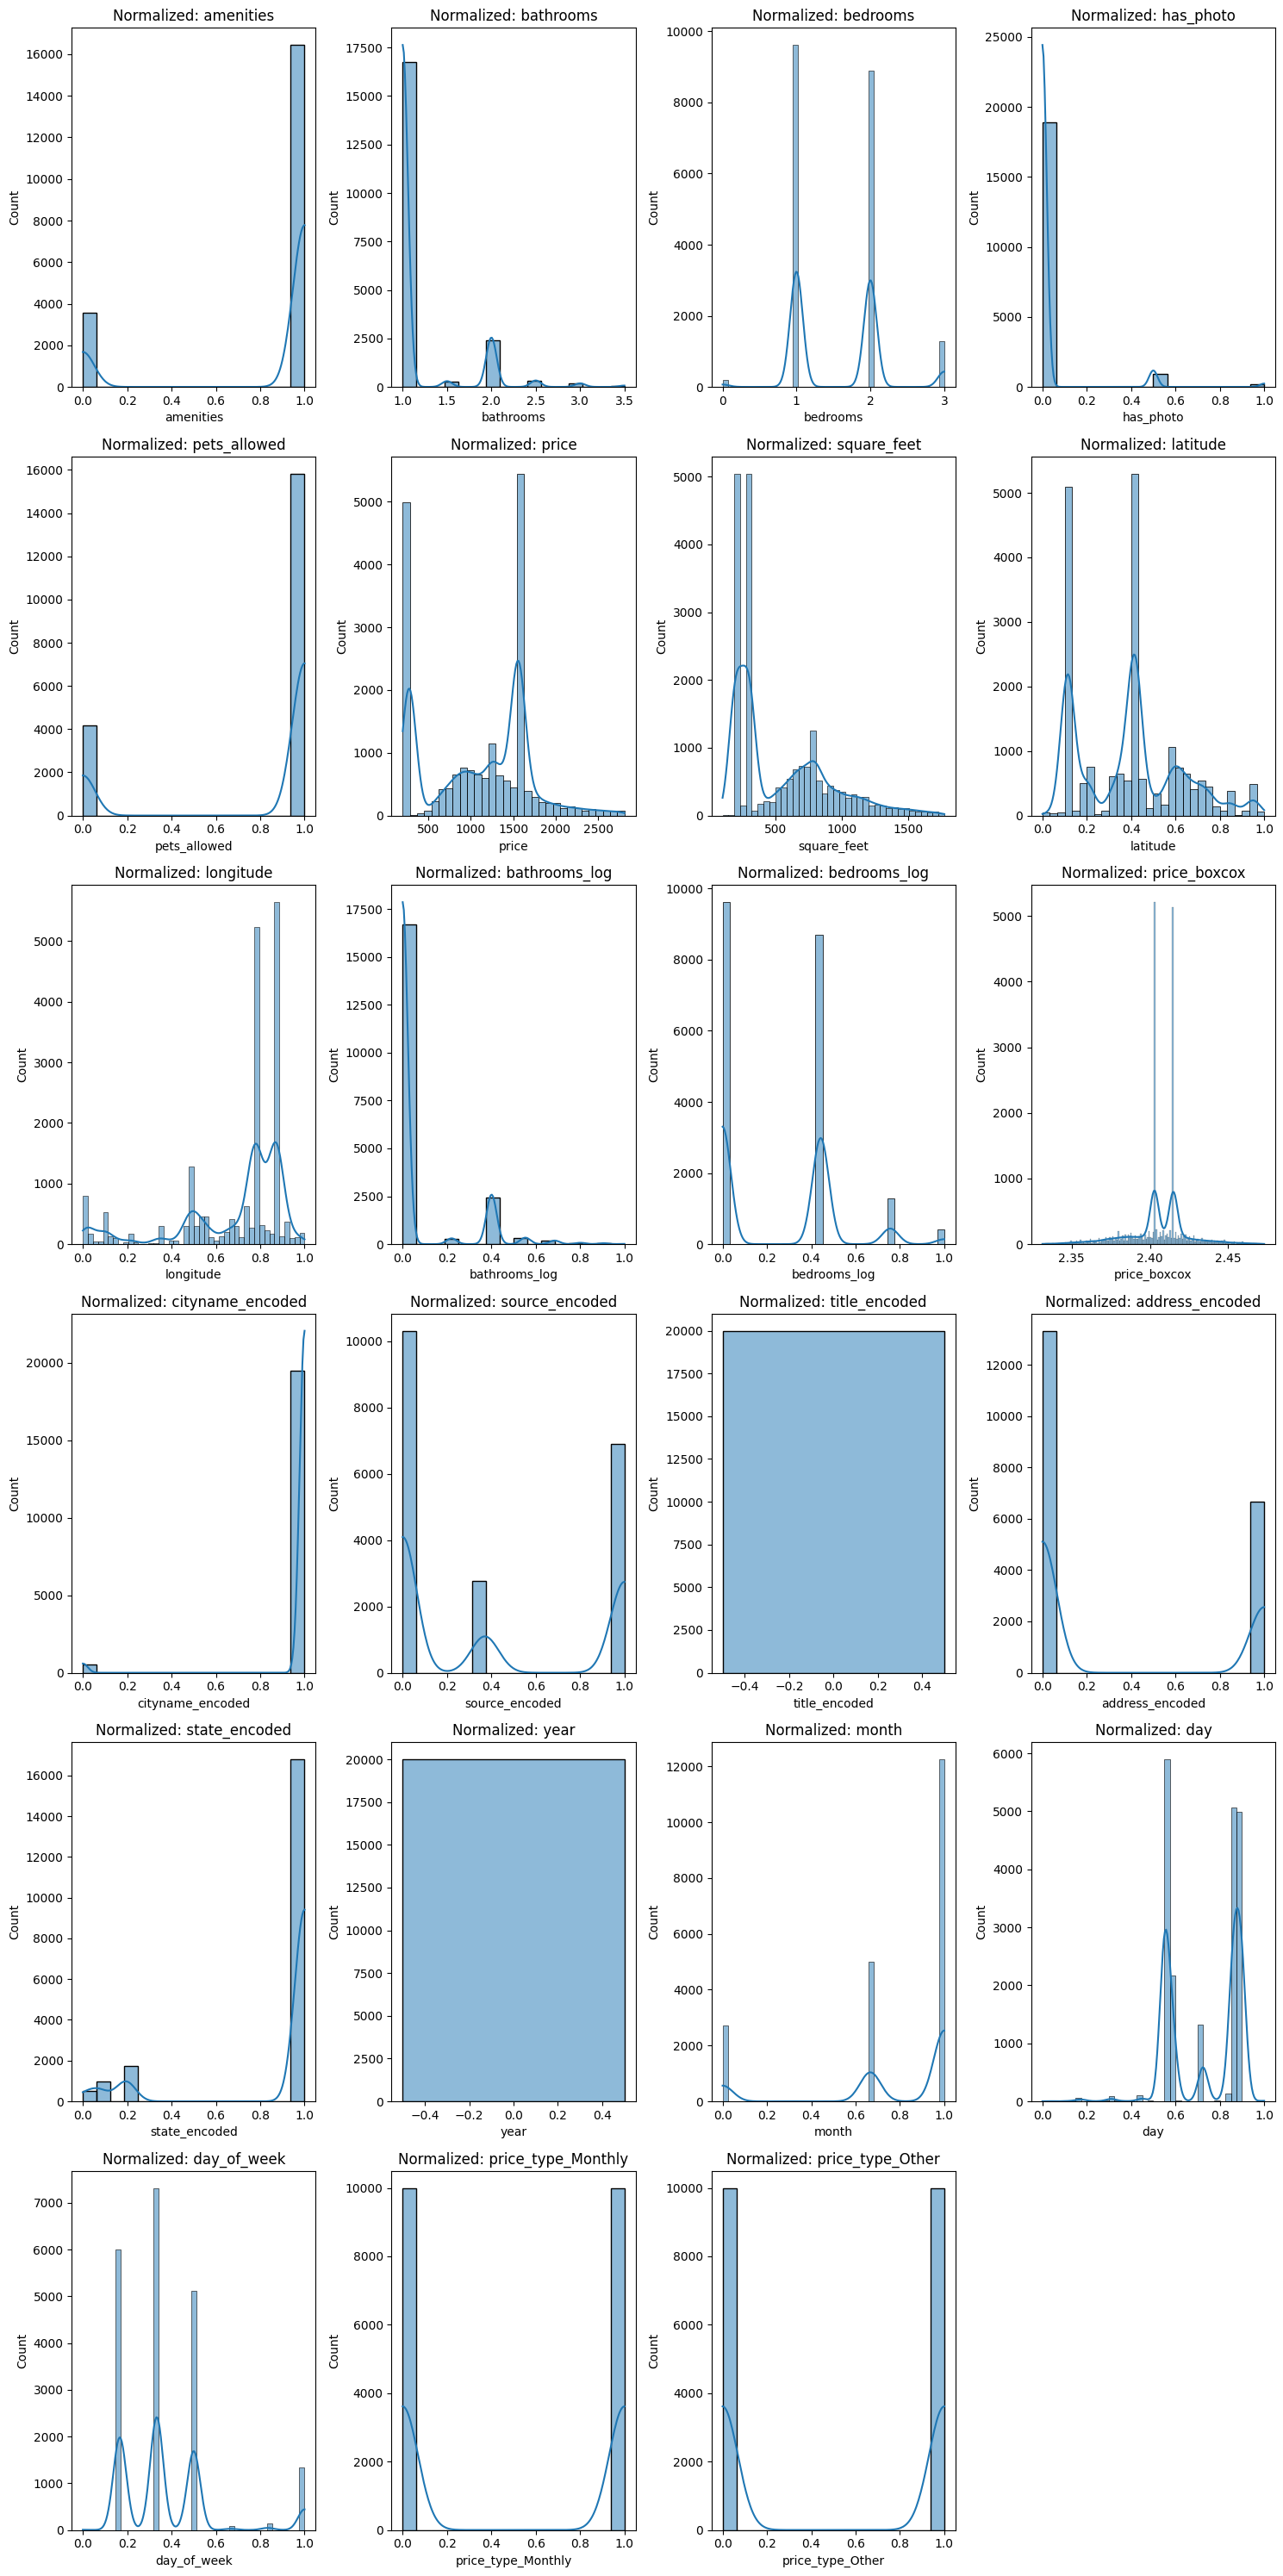

category  title  amenities  bathrooms  bedrooms  \
0      housing/rent/apartment  Other        0.0        1.0       0.0   
1      housing/rent/apartment  Other        0.0        1.0       1.0   
2      housing/rent/apartment  Other        0.0        1.0       0.0   
3      housing/rent/apartment  Other        0.0        1.0       0.0   
4      housing/rent/apartment  Other        0.0        1.0       0.0   
...                       ...    ...        ...        ...       ...   
19991  housing/rent/apartment  Other        1.0        1.0       2.0   
19992  housing/rent/apartment  Other        1.0        1.0       2.0   
19993  housing/rent/apartment  Other        1.0        1.0       2.0   
19994  housing/rent/apartment  Other        1.0        1.0       2.0   
19995  housing/rent/apartment  Other        1.0        1.0       2.0   

       has_photo  pets_allowed   price  square_feet       address  ...  \
0            0.0           0.0   790.0        101.0  Not Provided  ...   
1            0.0           0.0   425.0        106.0         Other  ...   
2            0.0           0.0  1390.0        107.0  Not Provided  ...   
3            0.0           0.0   925.0        116.0         Other  ...   
4            0.0           0.0   880.0        125.0  Not Provided  ...   
...          ...           ...     ...          ...           ...  ...   
19991        0.0           1.0   275.0        300.0  Not Provided  ...   
19992        0.0           1.0   275.0        300.0  Not Provided  ...   
19993        0.0           1.0   275.0        300.0  Not Provided  ...   
19994        0.0           1.0   275.0        300.0  Not Provided  ...   
19995        0.0           1.0   275.0        300.0  Not Provided  ...   

      title_encoded address_encoded  state_encoded            datetime year  \
0               0.0             0.0            1.0 2019-12-26 11:23:35  0.0   
1               0.0             1.0            1.0 2019-12-22 12:17:43  0.0   
2               0.0             0.0            1.0 2019-12-26 11:23:30  0.0   
3               0.0             1.0            0.0 2019-12-18 11:15:43  0.0   
4               0.0             0.0            1.0 2019-12-26 11:23:21  0.0   
...             ...             ...            ...                 ...  ...   
19991           0.0             0.0            1.0 2019-11-27 21:43:20  0.0   
19992           0.0             0.0            1.0 2019-11-27 21:43:20  0.0   
19993           0.0             0.0            1.0 2019-11-27 21:43:20  0.0   
19994           0.0             0.0            1.0 2019-11-27 21:43:20  0.0   
19995           0.0             0.0            1.0 2019-11-27 21:43:20  0.0   

          month       day  day_of_week  price_type_Monthly  price_type_Other  
0      1.000000  0.862069     0.500000                 1.0               0.0  
1      1.000000  0.724138     1.000000                 1.0               0.0  
2      1.000000  0.862069     0.500000                 1.0               0.0  
3      1.000000  0.586207     0.333333                 1.0               0.0  
4      1.000000  0.862069     0.500000                 1.0               0.0  
...         ...       ...          ...                 ...               ...  
19991  0.666667  0.896552     0.333333                 0.0               1.0  
19992  0.666667  0.896552     0.333333                 0.0               1.0  
19993  0.666667  0.896552     0.333333                 0.0               1.0  
19994  0.666667  0.896552     0.333333                 0.0               1.0  
19995  0.666667  0.896552     0.333333                 0.0               1.0  

[19996 rows x 30 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def normalize_data(df, exclude_cols=None):
    """
    Normalizes numerical columns in a DataFrame using MinMaxScaler,
    excluding specified columns.

    Args:
        df: The input DataFrame.
        exclude_cols: List of columns to exclude from normalization (default is None).

    Returns:
        A new DataFrame with normalized numerical columns (excluding the specified ones).
    """
    if exclude_cols is None:
        exclude_cols = []

    # Select numerical columns excluding the ones in exclude_cols
    numerical_cols = df.select_dtypes(include=np.number).columns
    numerical_cols_to_normalize = [col for col in numerical_cols if col not in exclude_cols]

    scaler = MinMaxScaler()
    df_normalized = df.copy()

    # Apply normalization only to the columns that are not excluded
    df_normalized[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

    return df_normalized

def plot_normalized_histograms(df):
    """
    Plots histograms of normalized numerical columns.

    Args:
        df: DataFrame with normalized columns.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numerical_cols)
    num_rows = (num_cols + 3) // 4  # Calculate rows for subplots

    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(num_rows, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Normalized: {col}")
    plt.tight_layout()
    plt.show()


# Specify the columns you want to exclude from normalization
exclude_columns = ['price', 'square_feet', 'address', 'cityname', 'state', 'title', 'bathrooms', 'bedrooms', 'source', 'price_boxcox']

# Apply normalization while excluding specific columns
df_normalized = normalize_data(df, exclude_cols=exclude_columns)

# Check the result
print("Normalization Results:\n", df_normalized.describe())

# Plot histograms of normalized data
plot_normalized_histograms(df_normalized)

# Display the normalized DataFrame
display(df_normalized)


# Data Standardization and Visualization
This code standardizes the numerical columns of a DataFrame using StandardScaler, transforming them to have a mean of 0 and a standard deviation of 1. The standardize_data function applies standardization only to the selected numerical columns, excluding specified columns like 'price' and 'square_feet'. After standardization, histograms of the transformed columns are plotted to visualize their distribution. This helps in understanding the scale of the data after the standardization process, preparing it for machine learning models that may require standardized features.








Standardization Results:
           amenities     bathrooms      bedrooms     has_photo  pets_allowed  \
count  19996.000000  19996.000000  19996.000000  1.999600e+04  1.999600e+04   
mean       0.000000      1.177260      1.563013 -2.274192e-17 -6.822575e-17   
min       -2.152734      1.000000      0.000000 -2.283903e-01 -1.950197e+00   
25%        0.464526      1.000000      1.000000 -2.283903e-01  5.127688e-01   
50%        0.464526      1.000000      2.000000 -2.283903e-01  5.127688e-01   
75%        0.464526      1.000000      2.000000 -2.283903e-01  5.127688e-01   
max        0.464526      3.500000      3.000000  6.924144e+00  5.127688e-01   
std        1.000025      0.428857      0.627279  1.000025e+00  1.000025e+00   

              price   square_feet      latitude     longitude  bathrooms_log  \
count  19996.000000  19996.000000  1.999600e+04  1.999600e+04   1.999600e+04   
mean    1113.046359    545.484147  2.274192e-15 -2.274192e-17  -4.093545e-16   
min      200.000000   

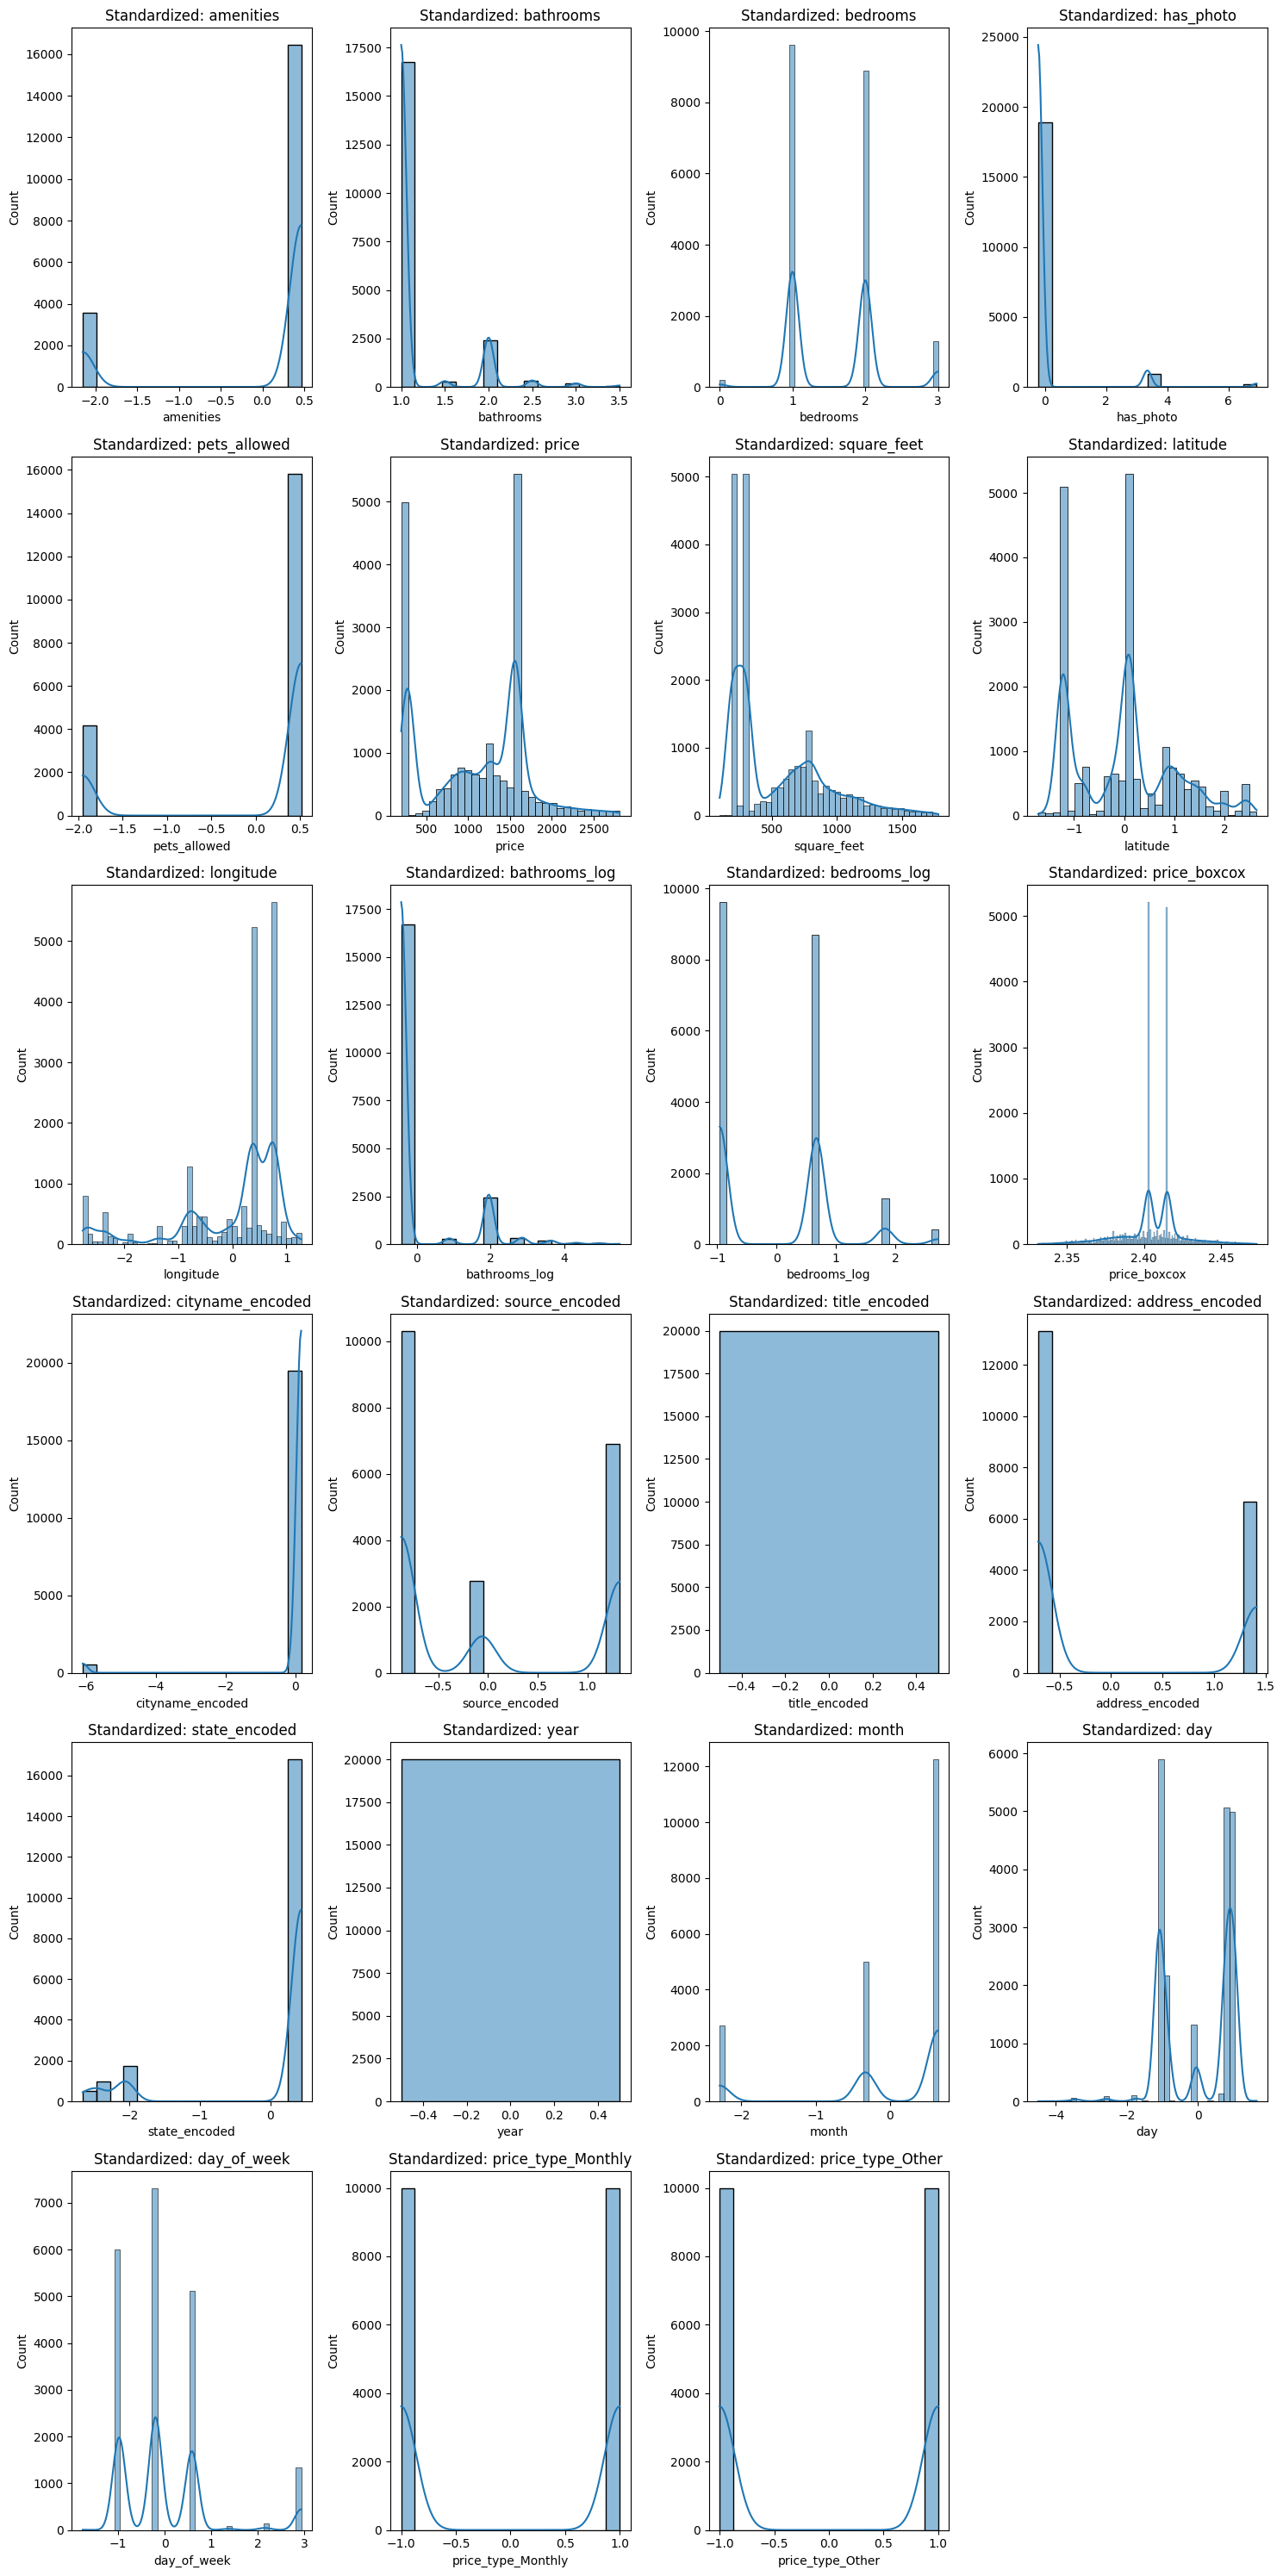

category  title  amenities  bathrooms  bedrooms  \
0      housing/rent/apartment  Other  -2.152734        1.0       0.0   
1      housing/rent/apartment  Other  -2.152734        1.0       1.0   
2      housing/rent/apartment  Other  -2.152734        1.0       0.0   
3      housing/rent/apartment  Other  -2.152734        1.0       0.0   
4      housing/rent/apartment  Other  -2.152734        1.0       0.0   
...                       ...    ...        ...        ...       ...   
19991  housing/rent/apartment  Other   0.464526        1.0       2.0   
19992  housing/rent/apartment  Other   0.464526        1.0       2.0   
19993  housing/rent/apartment  Other   0.464526        1.0       2.0   
19994  housing/rent/apartment  Other   0.464526        1.0       2.0   
19995  housing/rent/apartment  Other   0.464526        1.0       2.0   

       has_photo  pets_allowed   price  square_feet       address  ...  \
0       -0.22839     -1.950197   790.0        101.0  Not Provided  ...   
1       -0.22839     -1.950197   425.0        106.0         Other  ...   
2       -0.22839     -1.950197  1390.0        107.0  Not Provided  ...   
3       -0.22839     -1.950197   925.0        116.0         Other  ...   
4       -0.22839     -1.950197   880.0        125.0  Not Provided  ...   
...          ...           ...     ...          ...           ...  ...   
19991   -0.22839      0.512769   275.0        300.0  Not Provided  ...   
19992   -0.22839      0.512769   275.0        300.0  Not Provided  ...   
19993   -0.22839      0.512769   275.0        300.0  Not Provided  ...   
19994   -0.22839      0.512769   275.0        300.0  Not Provided  ...   
19995   -0.22839      0.512769   275.0        300.0  Not Provided  ...   

      title_encoded address_encoded  state_encoded            datetime year  \
0               0.0       -0.707717       0.435338 2019-12-26 11:23:35  0.0   
1               0.0        1.412994       0.435338 2019-12-22 12:17:43  0.0   
2               0.0       -0.707717       0.435338 2019-12-26 11:23:30  0.0   
3               0.0        1.412994      -2.665662 2019-12-18 11:15:43  0.0   
4               0.0       -0.707717       0.435338 2019-12-26 11:23:21  0.0   
...             ...             ...            ...                 ...  ...   
19991           0.0       -0.707717       0.435338 2019-11-27 21:43:20  0.0   
19992           0.0       -0.707717       0.435338 2019-11-27 21:43:20  0.0   
19993           0.0       -0.707717       0.435338 2019-11-27 21:43:20  0.0   
19994           0.0       -0.707717       0.435338 2019-11-27 21:43:20  0.0   
19995           0.0       -0.707717       0.435338 2019-11-27 21:43:20  0.0   

          month       day  day_of_week  price_type_Monthly  price_type_Other  
0      0.646832  0.811135     0.586020                 1.0              -1.0  
1      0.646832 -0.038051     2.927759                 1.0              -1.0  
2      0.646832  0.811135     0.586020                 1.0              -1.0  
3      0.646832 -0.887237    -0.194559                 1.0              -1.0  
4      0.646832  0.811135     0.586020                 1.0              -1.0  
...         ...       ...          ...                 ...               ...  
19991 -0.332946  1.023431    -0.194559                -1.0               1.0  
19992 -0.332946  1.023431    -0.194559                -1.0               1.0  
19993 -0.332946  1.023431    -0.194559                -1.0               1.0  
19994 -0.332946  1.023431    -0.194559                -1.0               1.0  
19995 -0.332946  1.023431    -0.194559                -1.0               1.0  

[19996 rows x 30 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def standardize_data(df, exclude_cols=None):
    """
    Standardizes numerical columns in a DataFrame using StandardScaler,
    excluding specified columns.

    Args:
        df: The input DataFrame.
        exclude_cols: List of columns to exclude from standardization (default is None).

    Returns:
        A new DataFrame with standardized numerical columns (excluding the specified ones).
    """
    if exclude_cols is None:
        exclude_cols = []

    # Select numerical columns excluding the ones in exclude_cols
    numerical_cols = df.select_dtypes(include=np.number).columns
    numerical_cols_to_standardize = [col for col in numerical_cols if col not in exclude_cols]

    scaler = StandardScaler()
    df_standardized = df.copy()

    # Apply standardization only to the columns that are not excluded
    df_standardized[numerical_cols_to_standardize] = scaler.fit_transform(df[numerical_cols_to_standardize])

    return df_standardized

def plot_standardized_histograms(df):
    """
    Plots histograms of standardized numerical columns.

    Args:
        df: DataFrame with standardized columns.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numerical_cols)
    num_rows = (num_cols + 3) // 4  # Calculate rows for subplots

    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(num_rows, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Standardized: {col}")
    plt.tight_layout()
    plt.show()

# Example usage
# Specify the columns you want to exclude from standardization (e.g., 'price', 'square_feet')
exclude_columns = ['price', 'square_feet','address','cityname','state','title','bathrooms','bedrooms','source','price_boxcox']

# Apply standardization while excluding specific columns
df = standardize_data(df, exclude_cols=exclude_columns)

# Check the result
print("Standardization Results:\n", df.describe())

# Plot histograms of standardized data
plot_standardized_histograms(df)
display(df)

# Dimensionality Reduction:
This code applies **Principal Component Analysis (PCA)** to reduce the dataset's dimensionality while retaining a specified variance (e.g., 95%). It excludes certain columns from PCA, transforms the numerical data, and combines the PCA components with the original columns. A plot of the cumulative explained variance is generated to show the information captured by each component. This helps simplify datasets, improve efficiency, and manage high-dimensional data.


PCA Applied DataFrame:
     price  square_feet       address cityname  state  title  bathrooms  \
0   790.0        101.0  Not Provided    Other  Other  Other        1.0   
1   425.0        106.0         Other    Other  Other  Other        1.0   
2  1390.0        107.0  Not Provided    Other  Other  Other        1.0   
3   925.0        116.0         Other    Other     WA  Other        1.0   
4   880.0        125.0  Not Provided    Other  Other  Other        1.0   

   bedrooms     source  price_boxcox  ...       PC2       PC3       PC4  \
0       0.0  RentLingo      2.370940  ...  0.111744 -0.000594  0.886785   
1       1.0  RentLingo      2.402918  ...  0.796073 -1.335204  0.832816   
2       0.0  RentLingo      2.408357  ...  0.112408  0.000550  0.883903   
3       0.0  RentLingo      2.382231  ... -0.634293 -1.577478 -0.595199   
4       0.0  RentLingo      2.378737  ...  0.113184  0.001744  0.882289   

        PC5       PC6       PC7       PC8       PC9      PC10      PC11  
0  1.

price  square_feet       address cityname  state  title  bathrooms  \
0       790.0        101.0  Not Provided    Other  Other  Other        1.0   
1       425.0        106.0         Other    Other  Other  Other        1.0   
2      1390.0        107.0  Not Provided    Other  Other  Other        1.0   
3       925.0        116.0         Other    Other     WA  Other        1.0   
4       880.0        125.0  Not Provided    Other  Other  Other        1.0   
...       ...          ...           ...      ...    ...    ...        ...   
19991   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19992   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19993   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19994   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19995   275.0        300.0  Not Provided    Other  Other  Other        1.0   

       bedrooms     source  price_boxcox  ...       PC2       PC3       PC4  \
0           0.0  RentLingo      2.370940  ...  0.111744 -0.000594  0.886785   
1           1.0  RentLingo      2.402918  ...  0.796073 -1.335204  0.832816   
2           0.0  RentLingo      2.408357  ...  0.112408  0.000550  0.883903   
3           0.0  RentLingo      2.382231  ... -0.634293 -1.577478 -0.595199   
4           0.0  RentLingo      2.378737  ...  0.113184  0.001744  0.882289   
...         ...        ...           ...  ...       ...       ...       ...   
19991       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19992       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19993       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19994       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19995       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   

            PC5       PC6       PC7       PC8       PC9      PC10      PC11  
0      1.460632  0.306179 -2.330686  0.378671 -0.289874  0.274032  0.077825  
1      1.591381 -0.403693 -1.987371  0.397781  1.057850 -1.035952  0.772709  
2      1.456917  0.305332 -2.331443  0.378253 -0.289480  0.274447  0.078498  
3     -2.305600  0.654972 -1.716752 -0.203915 -0.033843  1.387627  0.517491  
4      1.456180  0.305247 -2.331801  0.378309 -0.288911  0.273210  0.077789  
...         ...       ...       ...       ...       ...       ...       ...  
19991  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19992  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19993  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19994  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19995  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  

[19996 rows x 22 columns]


Column Names After PCA Transformation:
Index(['price', 'square_feet', 'address', 'cityname', 'state', 'title',
       'bathrooms', 'bedrooms', 'source', 'price_boxcox', 'datetime', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
      dtype='object')

Summary Statistics for Original Data:
              price   square_feet     bathrooms      bedrooms  price_boxcox  \
count  19996.000000  19996.000000  19996.000000  19996.000000  19996.000000   
mean    1113.046359    545.484147      1.177260      1.563013      2.405596   
min      200.000000    101.000000      1.000000      0.000000      2.331275   
25%      400.000000    200.000000      1.000000      1.000000      2.402918   
50%     1270.000000    300.000000      1.000000      2.000000      2.402918   
75%     1560.000000    802.000000      1.000000      2.000000      2.415034   
max     2810.000000   1776.000000      3.500000      3.000000      2.473091   
std      600.980306    365.905732     

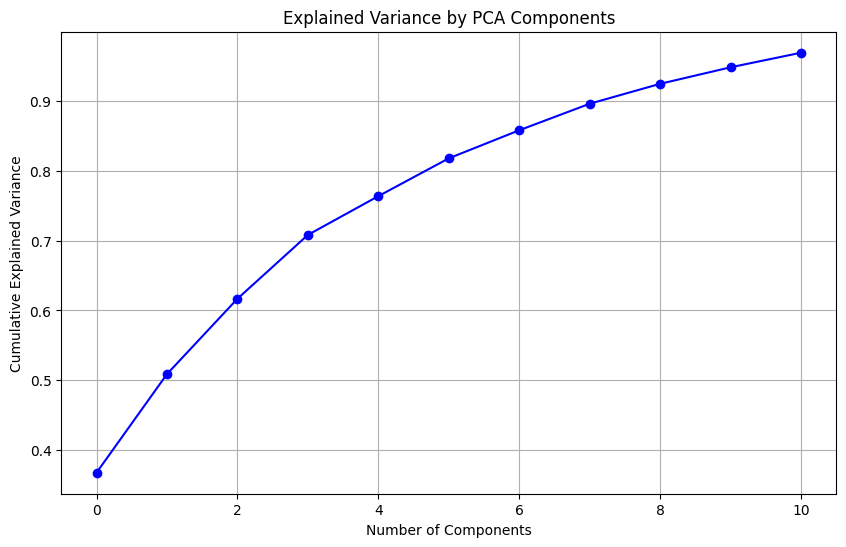

price  square_feet       address cityname  state  title  bathrooms  \
0       790.0        101.0  Not Provided    Other  Other  Other        1.0   
1       425.0        106.0         Other    Other  Other  Other        1.0   
2      1390.0        107.0  Not Provided    Other  Other  Other        1.0   
3       925.0        116.0         Other    Other     WA  Other        1.0   
4       880.0        125.0  Not Provided    Other  Other  Other        1.0   
...       ...          ...           ...      ...    ...    ...        ...   
19991   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19992   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19993   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19994   275.0        300.0  Not Provided    Other  Other  Other        1.0   
19995   275.0        300.0  Not Provided    Other  Other  Other        1.0   

       bedrooms     source  price_boxcox  ...       PC2       PC3       PC4  \
0           0.0  RentLingo      2.370940  ...  0.111744 -0.000594  0.886785   
1           1.0  RentLingo      2.402918  ...  0.796073 -1.335204  0.832816   
2           0.0  RentLingo      2.408357  ...  0.112408  0.000550  0.883903   
3           0.0  RentLingo      2.382231  ... -0.634293 -1.577478 -0.595199   
4           0.0  RentLingo      2.378737  ...  0.113184  0.001744  0.882289   
...         ...        ...           ...  ...       ...       ...       ...   
19991       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19992       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19993       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19994       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   
19995       2.0      Other      2.402918  ...  0.814095  1.468867 -0.427774   

            PC5       PC6       PC7       PC8       PC9      PC10      PC11  
0      1.460632  0.306179 -2.330686  0.378671 -0.289874  0.274032  0.077825  
1      1.591381 -0.403693 -1.987371  0.397781  1.057850 -1.035952  0.772709  
2      1.456917  0.305332 -2.331443  0.378253 -0.289480  0.274447  0.078498  
3     -2.305600  0.654972 -1.716752 -0.203915 -0.033843  1.387627  0.517491  
4      1.456180  0.305247 -2.331801  0.378309 -0.288911  0.273210  0.077789  
...         ...       ...       ...       ...       ...       ...       ...  
19991  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19992  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19993  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19994  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  
19995  0.087418 -0.392176 -0.245153 -0.007008 -0.062348  0.059527  0.111172  

[19996 rows x 22 columns]

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def apply_pca(df, excluded_cols, variance_threshold=0.95):
    """
    Applies PCA to the dataset, excluding specified columns and retaining the desired variance.

    Args:
        df (pd.DataFrame): The input DataFrame with normalized data.
        excluded_cols (list): List of columns to exclude from PCA.
        variance_threshold (float): The desired amount of variance to retain (e.g., 0.90 for 90% variance).

    Returns:
        pd.DataFrame: The dataset with PCA applied, excluding the original columns.
    """
    # Step 1: Exclude the specified columns (the ones you want to keep for final analysis)
    df_pca_input = df.drop(columns=excluded_cols)

    # Step 2: Select only numeric columns for PCA
    df_pca_input = df_pca_input.select_dtypes(include=['float64', 'int64'])

    # Step 3: Apply PCA to the remaining numeric columns
    pca = PCA(n_components=variance_threshold)  # Retain the specified amount of variance
    df_pca = pca.fit_transform(df_pca_input)

    # Step 4: Create a DataFrame with the PCA results and column names for the components
    pca_columns = [f"PC{i+1}" for i in range(df_pca.shape[1])]
    df_pca_result = pd.DataFrame(df_pca, columns=pca_columns)

    # Step 5: Combine the PCA components with the original excluded columns
    df_final = pd.concat([df[excluded_cols].reset_index(drop=True), df_pca_result], axis=1)

    return df_final, pca

# Example usage
excluded_cols = ['price', 'square_feet','address','cityname','state','title','bathrooms','bedrooms','source','price_boxcox','datetime']  # List the columns you want to exclude from PCA
df, pca_model = apply_pca(df, excluded_cols)

# Output the resulting DataFrame and PCA model
print("\nPCA Applied DataFrame:\n", df.head())
display(df)  # This will display the DataFrame in a Jupyter Notebook or IPython environment

print("\nColumn Names After PCA Transformation:")
print(df.columns)

# Summary statistics for the original data before PCA
print("\nSummary Statistics for Original Data:")
print(df.describe())

print("\nPlot the explained variance ratio for each component\n")
explained_variance = pca_model.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

display(df)


# Univariate Analysis:
This code generates various visualizations to explore the dataset, including line plots for each column, histograms for numeric columns, and bar charts for categorical variables. It also creates pie charts for specific columns to illustrate category distributions, box plots for identifying outliers in numeric data, and density plots to visualize the smooth distribution of numeric columns. These visualizations provide valuable insights into data trends, distributions, and relationships, assisting in effective data analysis and interpretation.


Plot grid for line plots



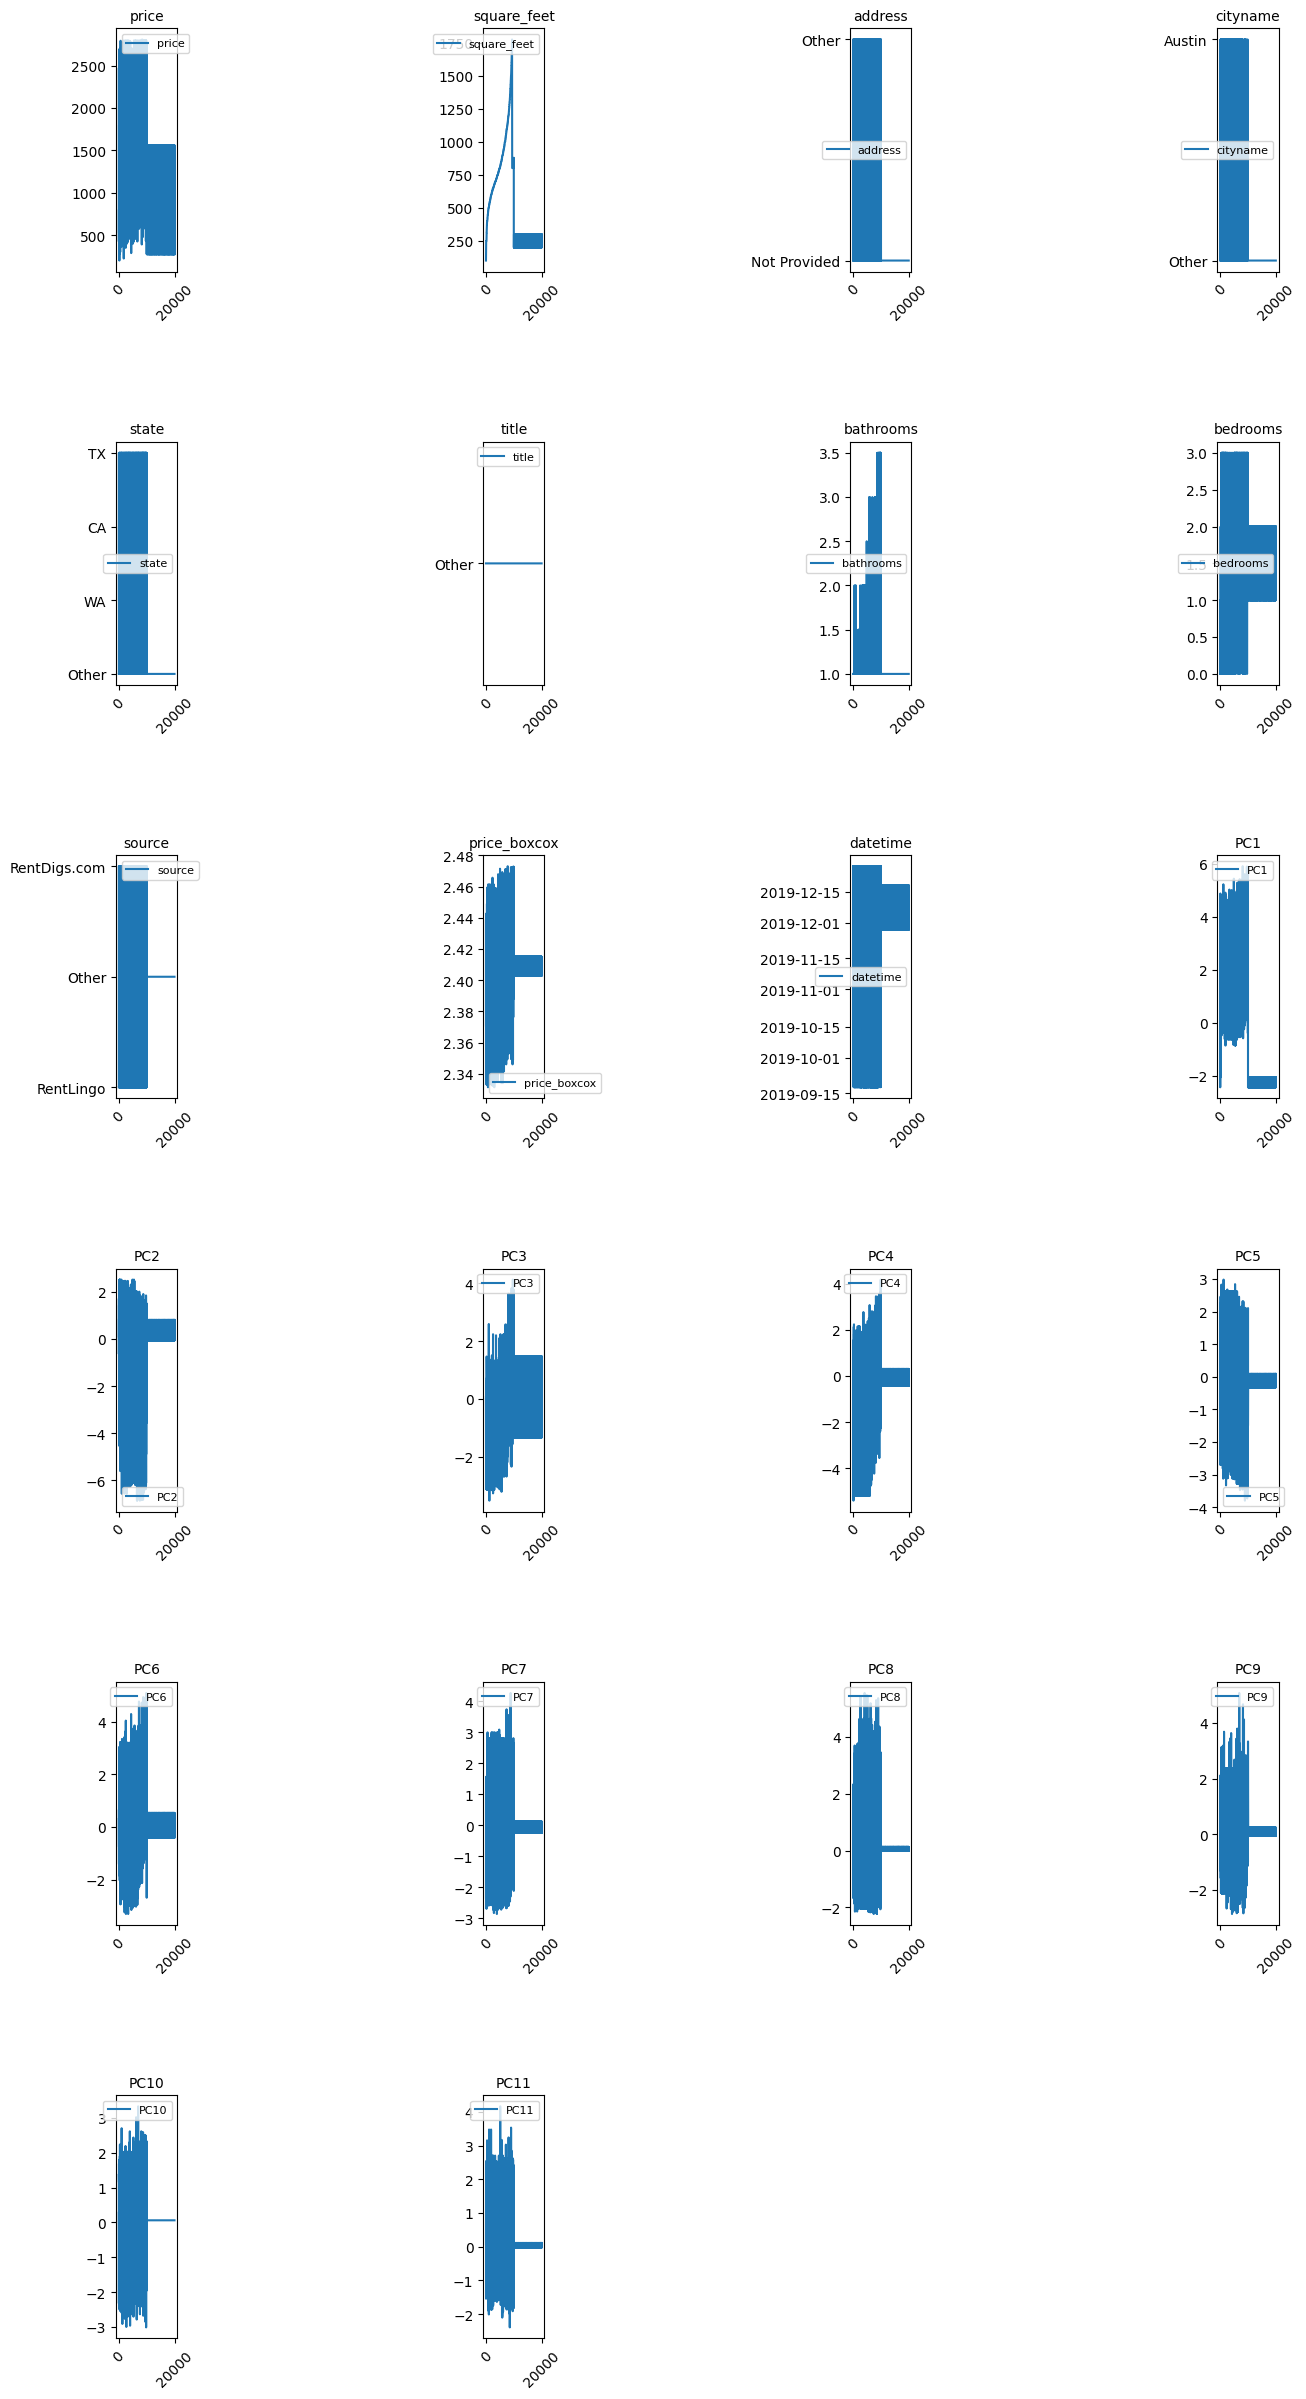


Histograms for numeric columns



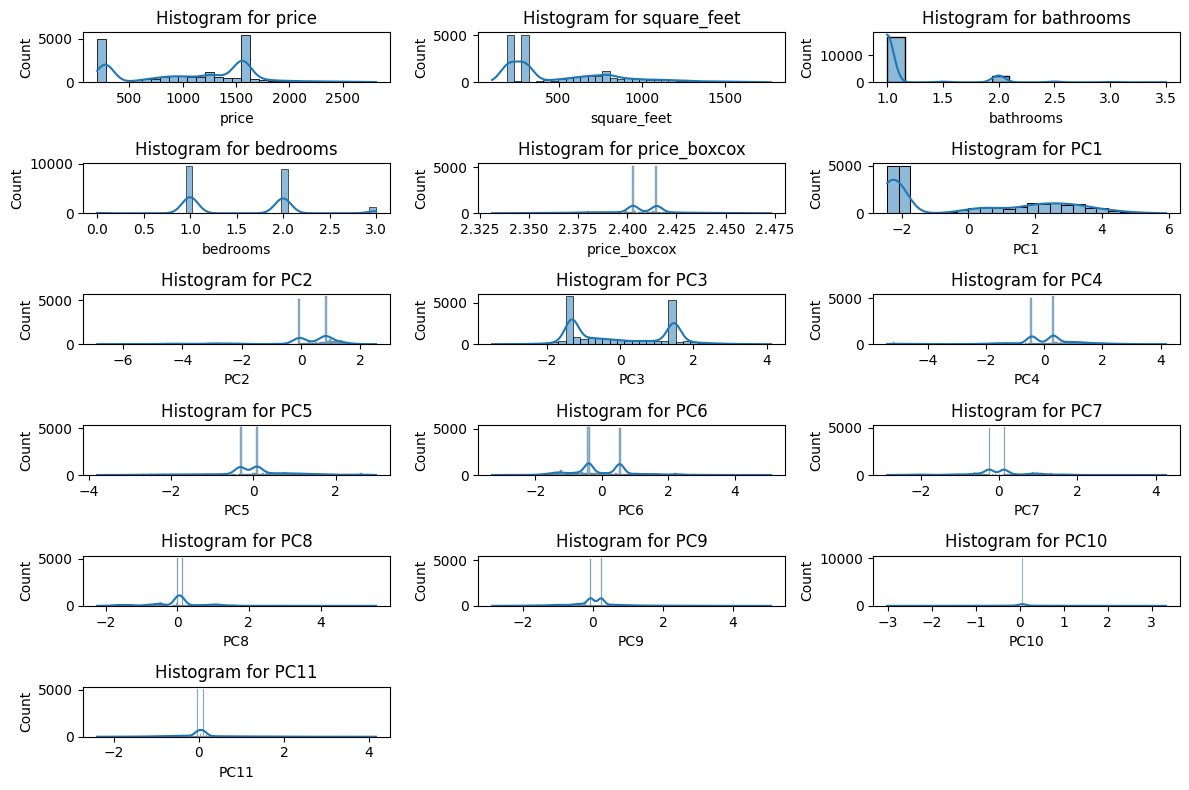


Bar charts for categorical columns



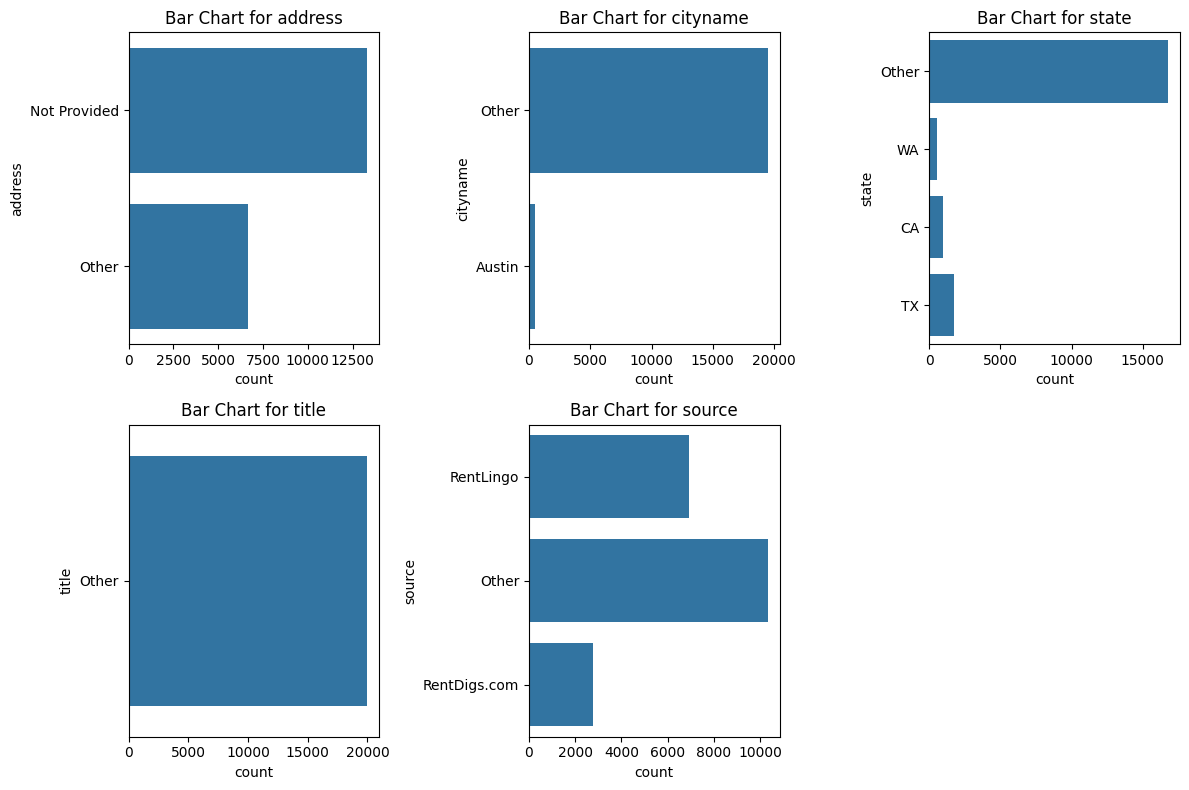


Pie charts for specific columns



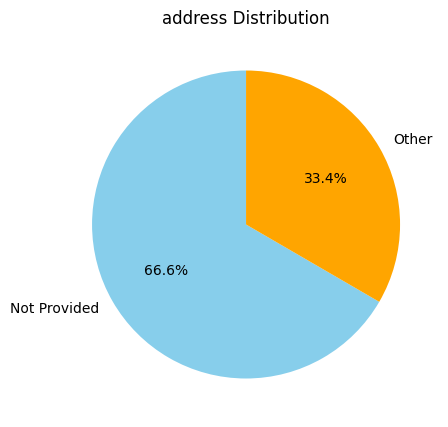

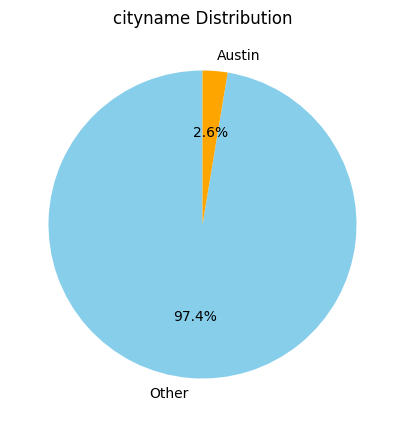

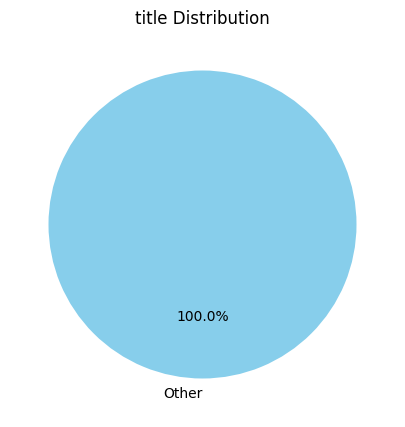

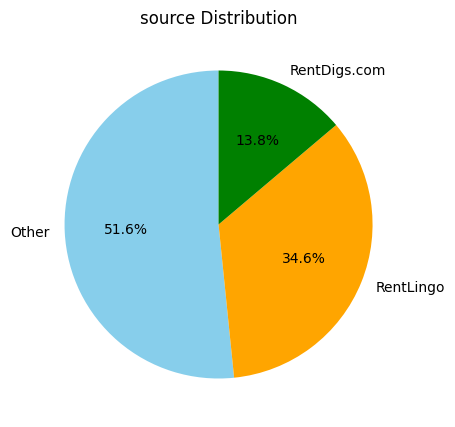

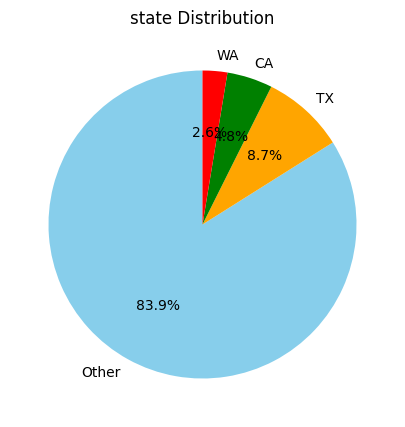


Box plots for numeric columns



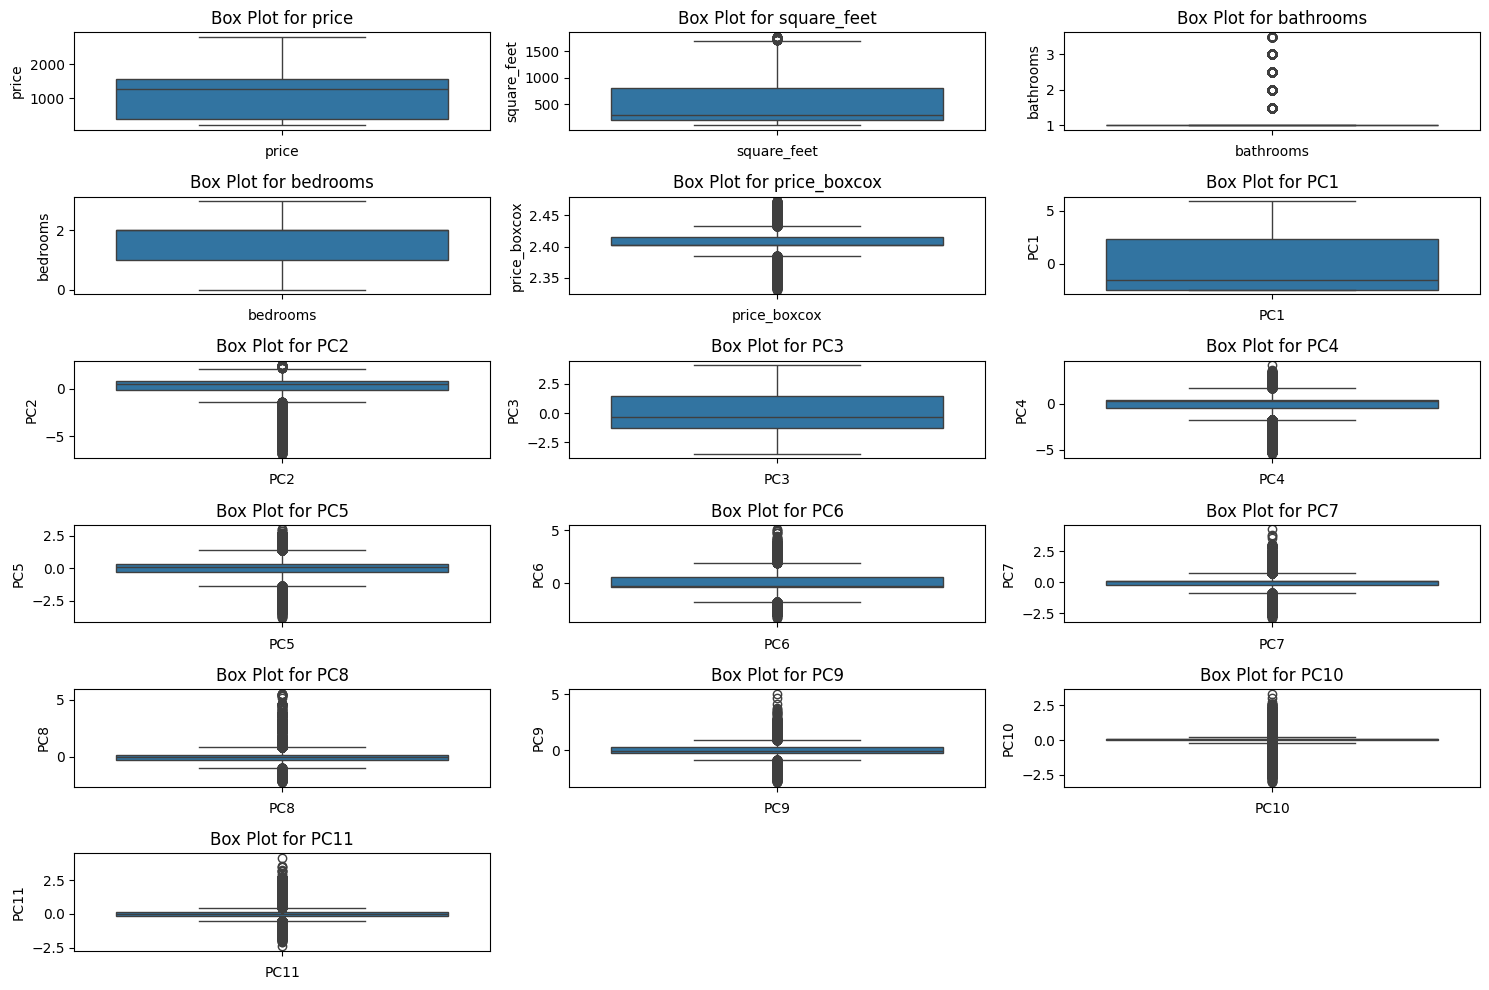


Density plots for numeric columns



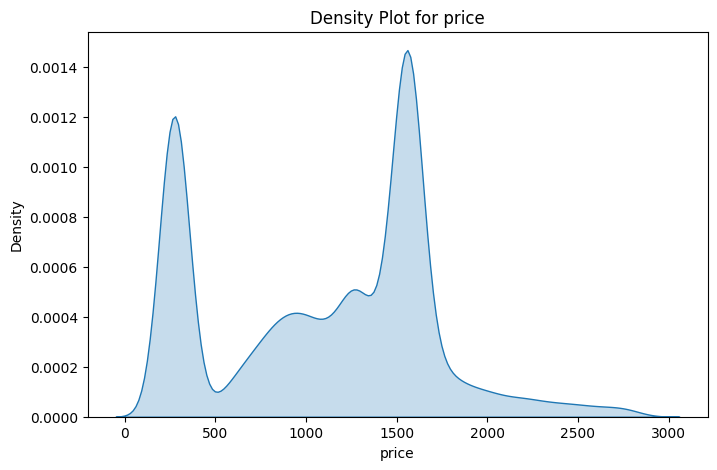

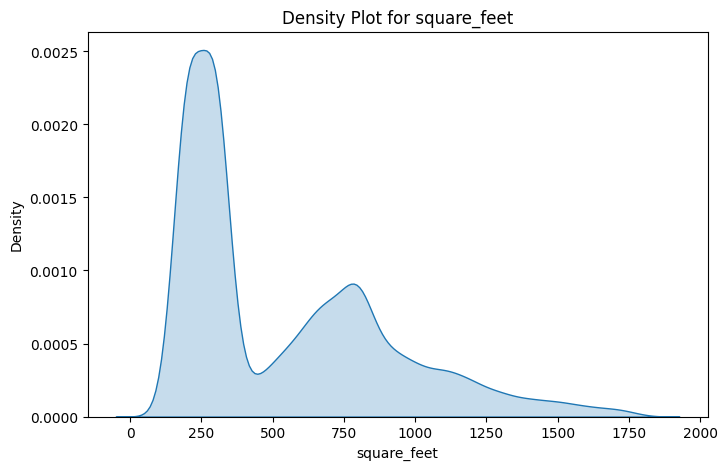

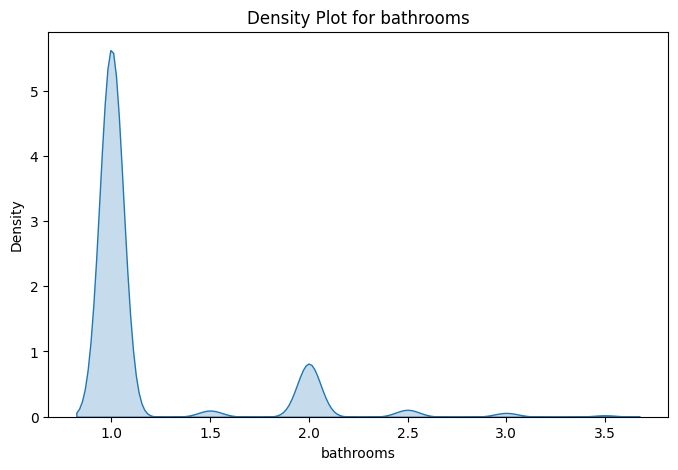

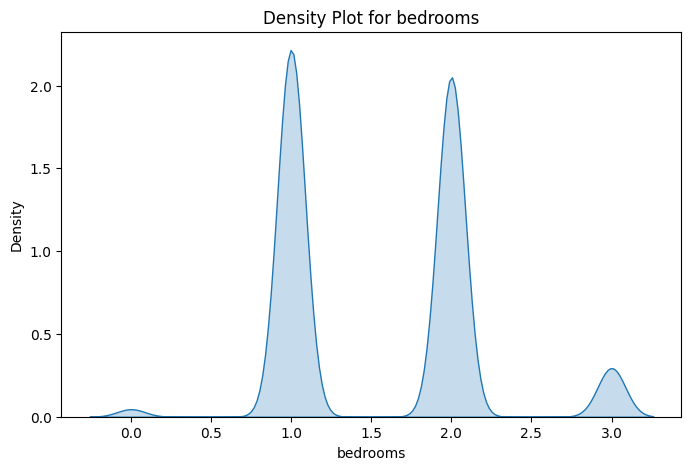

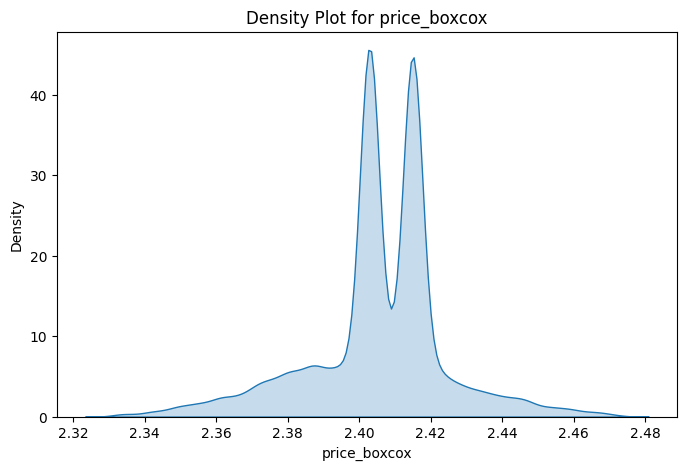

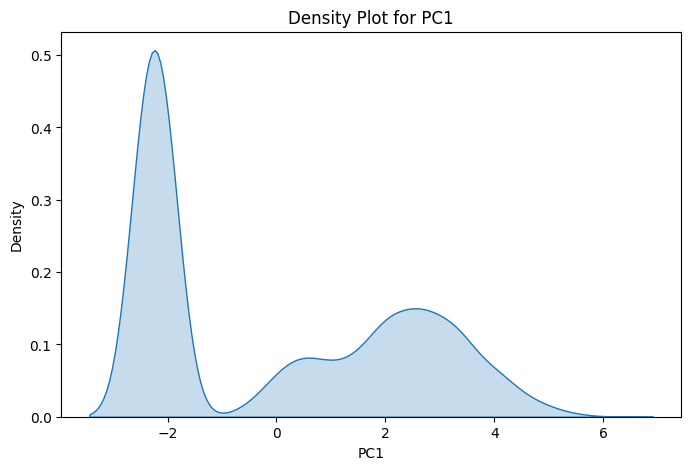

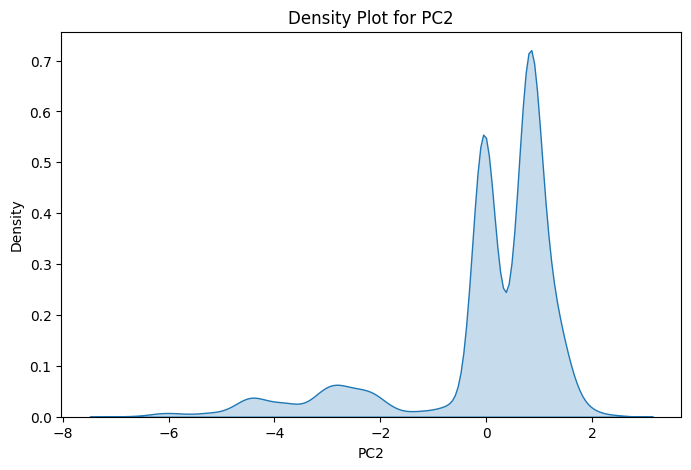

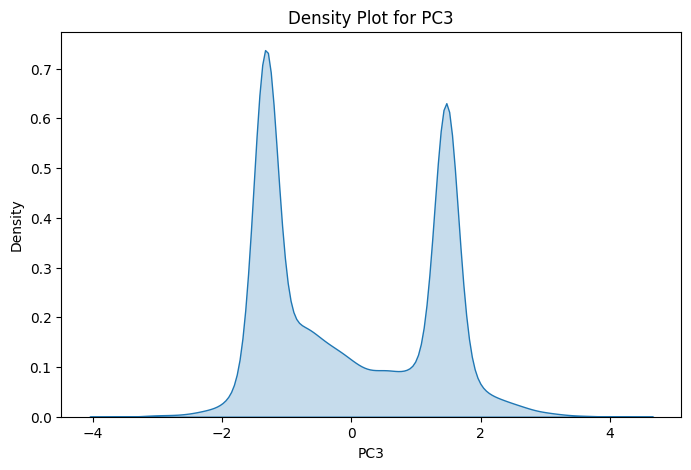

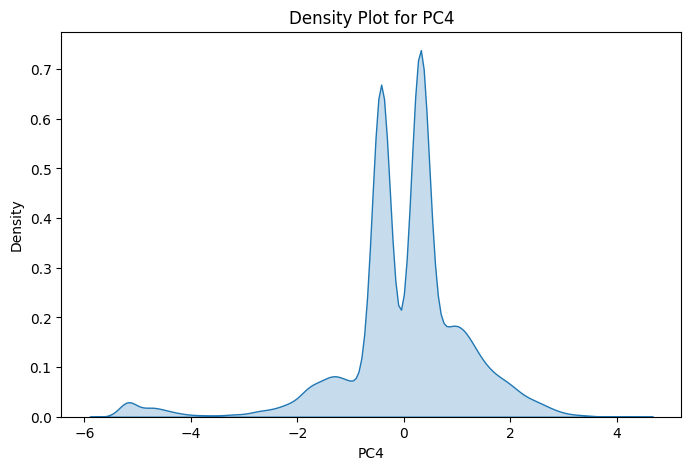

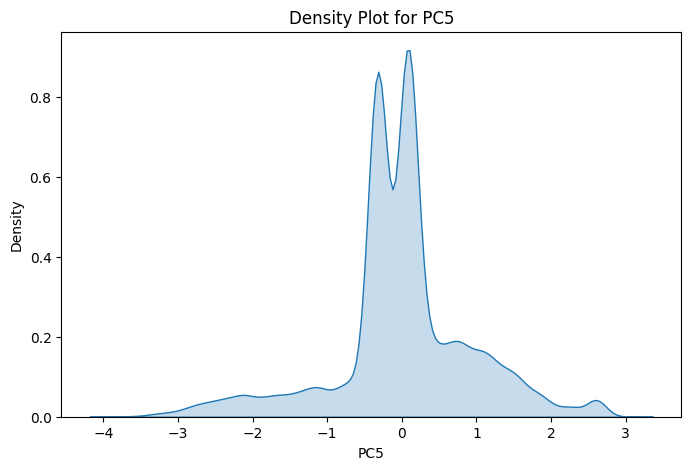

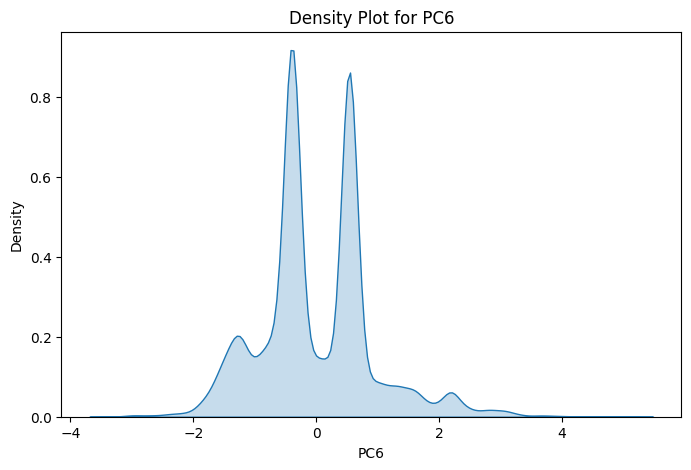

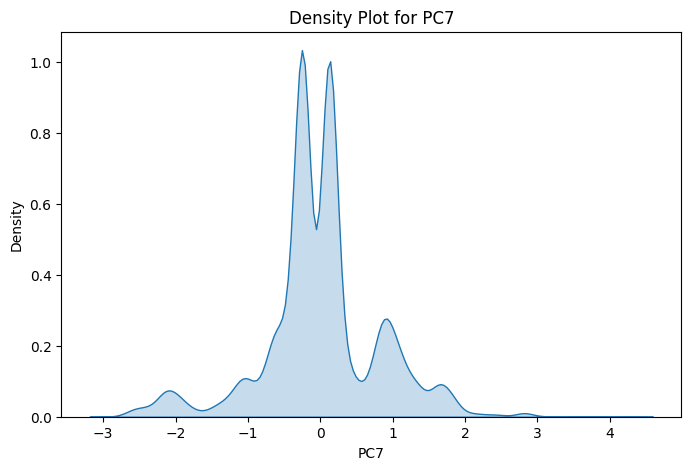

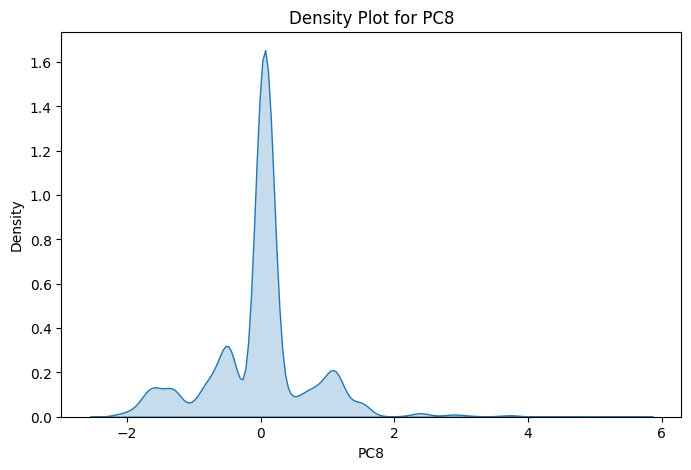

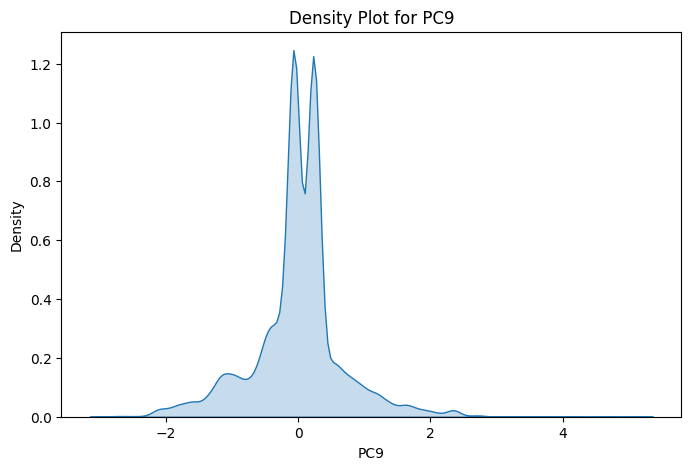

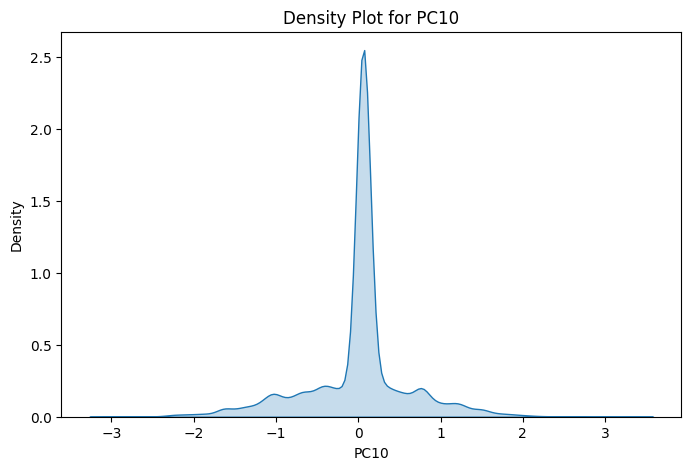

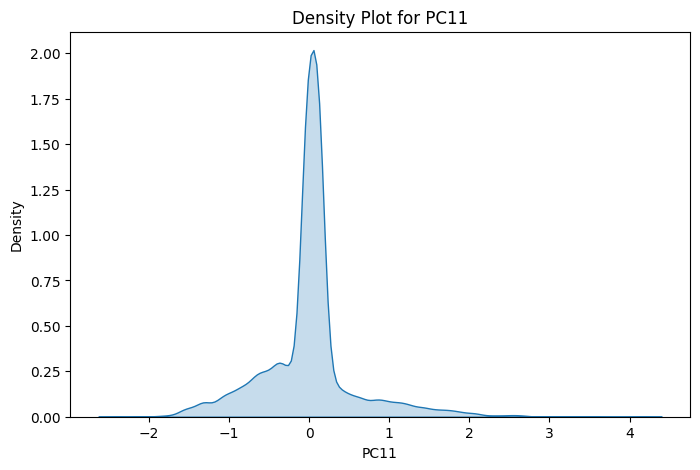

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nPlot grid for line plots\n")
num_columns = len(df.columns)
rows = (num_columns // 4) + 1
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    axes[i].plot(df[column], label=column)
    axes[i].set_title(column, fontsize=10)
    axes[i].legend(fontsize=8)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.subplots_adjust(hspace=0.7, wspace=5)
plt.show()

print("\nHistograms for numeric columns\n")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram for {column}')
plt.tight_layout()
plt.show()

print("\nBar charts for categorical columns\n")
n_rows = math.ceil(len(categorical_columns) / n_cols)
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=df[column].dropna())
    plt.title(f'Bar Chart for {column}')
plt.tight_layout()
plt.show()

print("\nPie charts for specific columns\n")
def plot_pie_charts(df, columns):
    for column in columns:
        if column in df.columns:
            category_counts = df[column].value_counts()
            plt.figure(figsize=(8, 5))
            category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'red'])
            plt.title(f'{column} Distribution')
            plt.ylabel('')
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")
columns_to_plot = ['address', 'cityname','title','source','state']
plot_pie_charts(df, columns_to_plot)

print("\nBox plots for numeric columns\n")
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

print("\nDensity plots for numeric columns\n")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[column], fill=True)
    plt.title(f"Density Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()


# Bivariate Analysis:
The code defines two functions for visualizing the relationship between a target variable and other features in a dataset. The `plot_target_vs_features()` function creates scatter plots to examine how numerical features relate to the target variable (such as 'price'), allowing for the detection of correlations or trends between continuous variables. The `plot_target_vs_categorical()` function generates box plots to explore how categorical features affect the distribution of the target variable, helping to understand differences across categories. These visualizations are useful for exploratory data analysis, offering insights into patterns and relationships within the dataset.


Function to plot scatter plots for numerical features vs the target variable



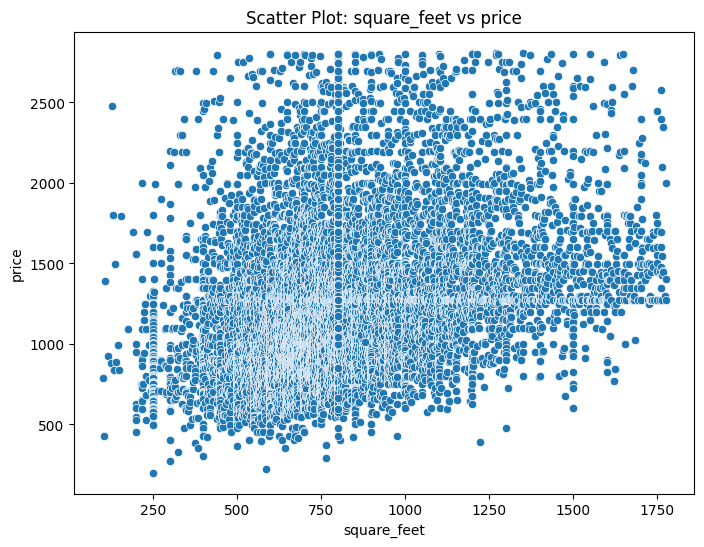

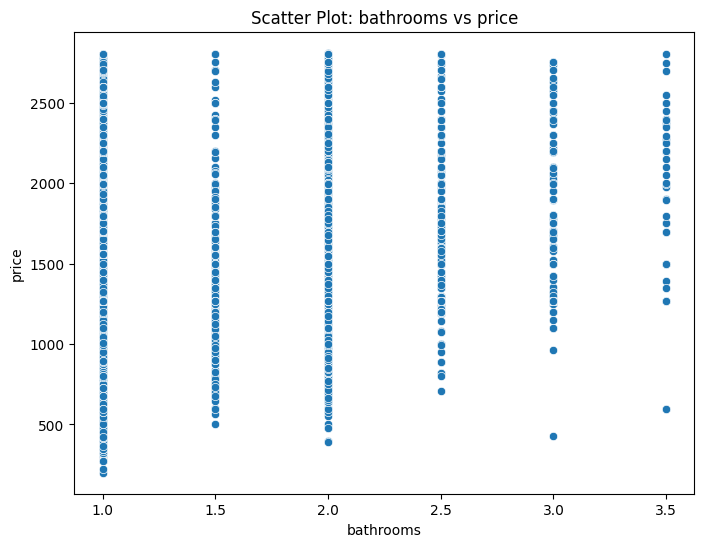

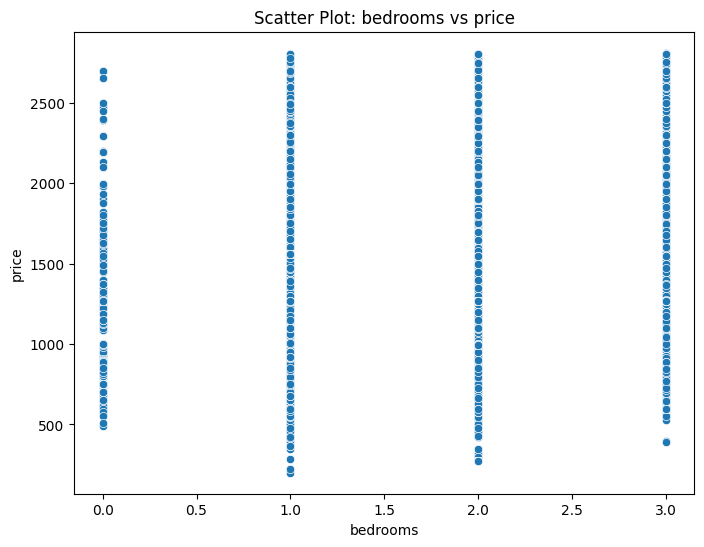

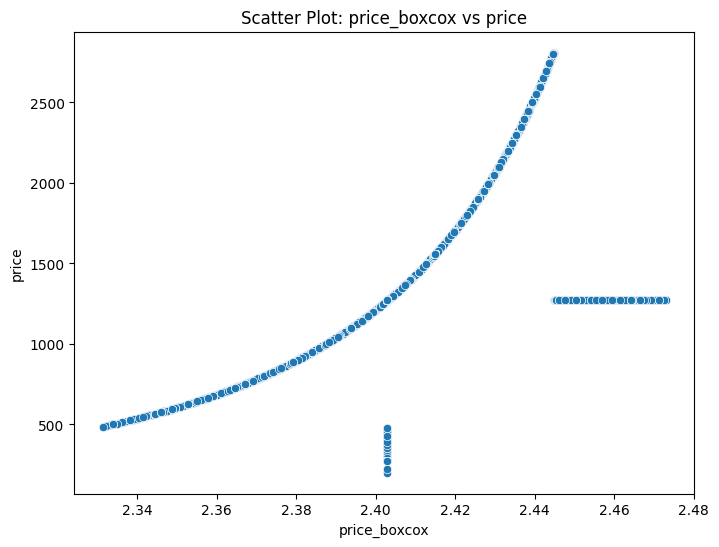

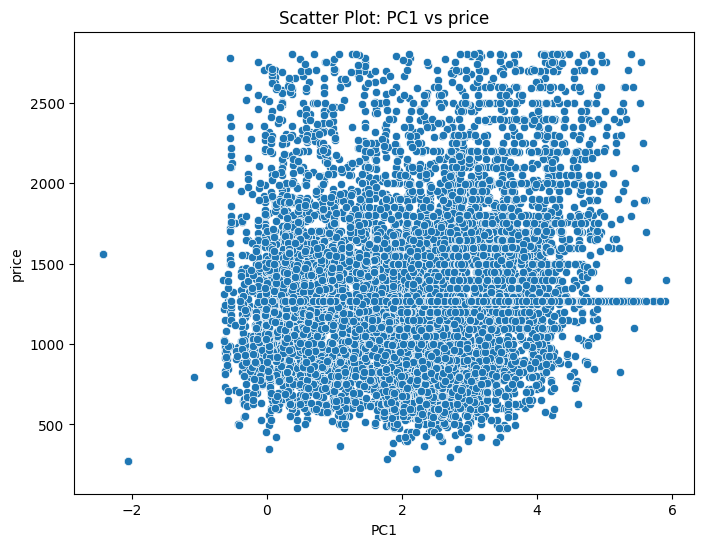

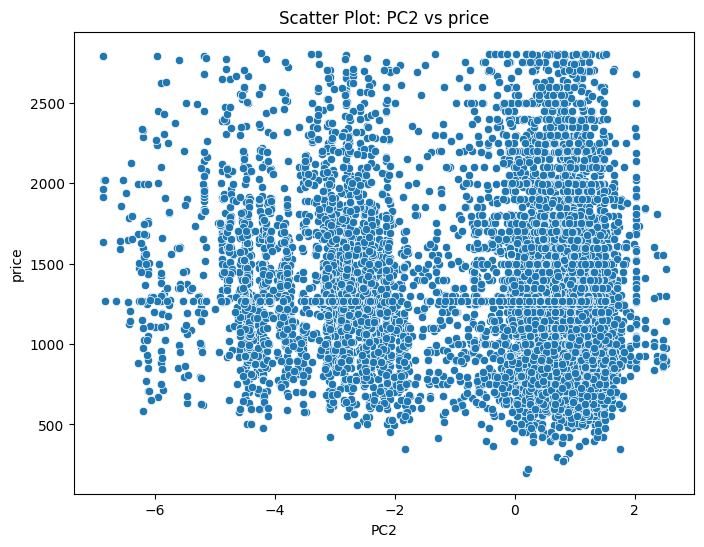

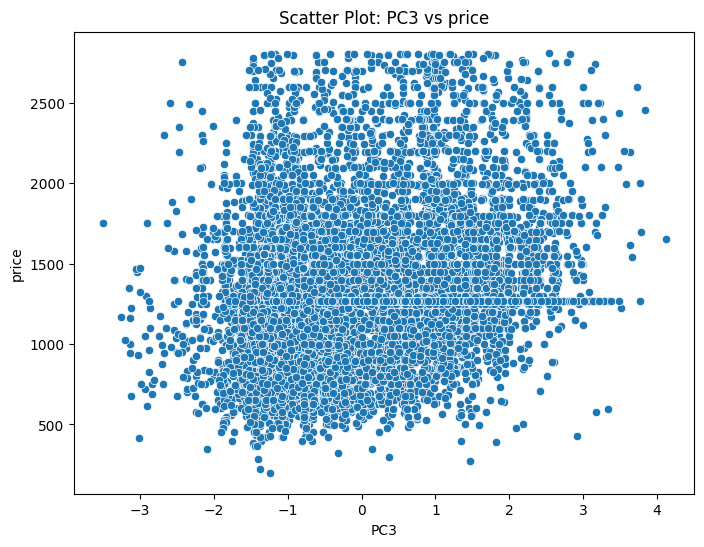

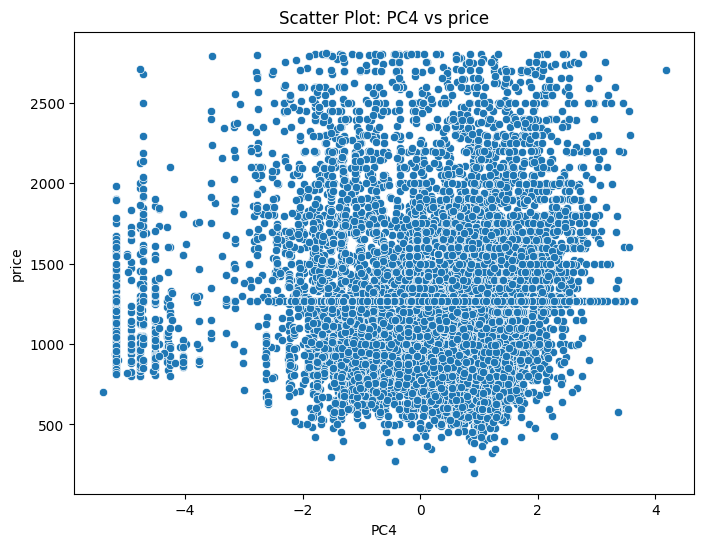

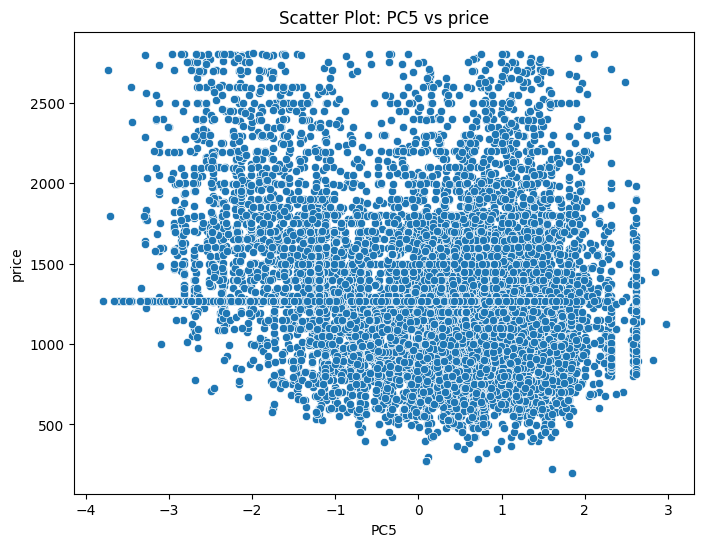

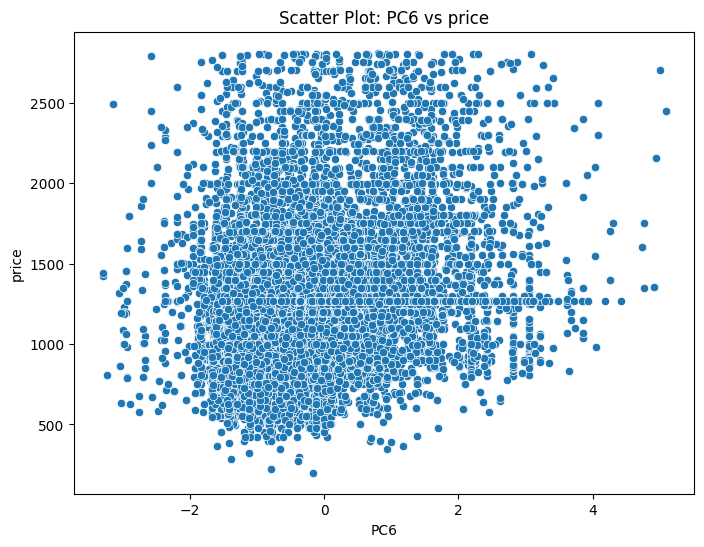

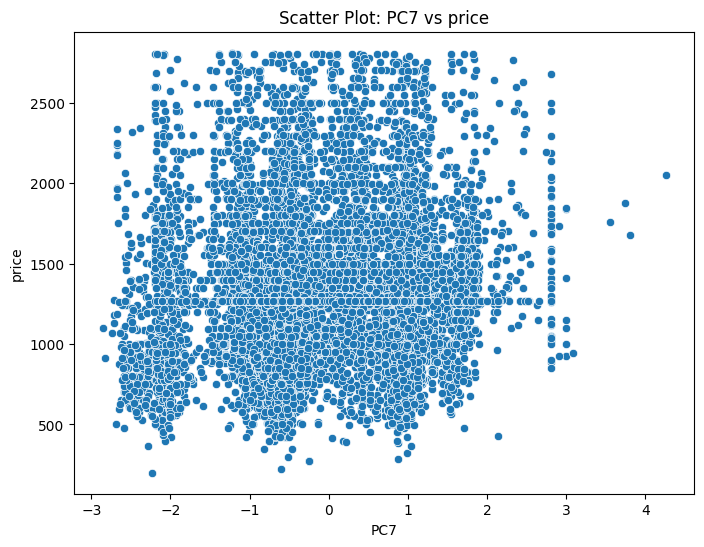

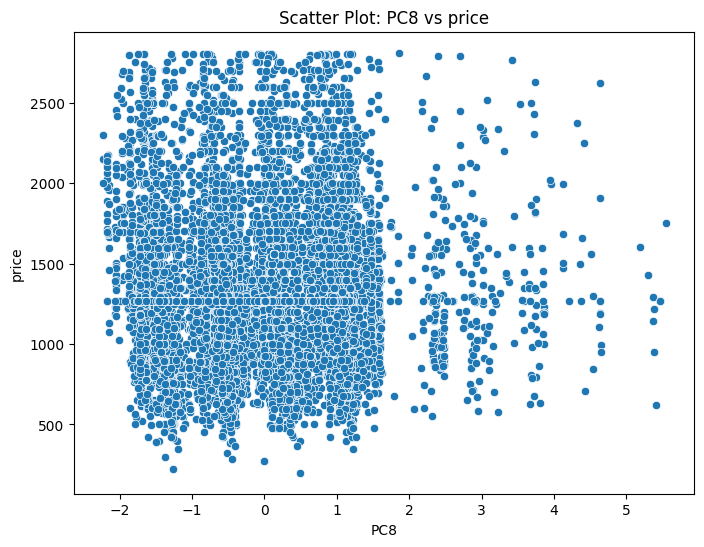

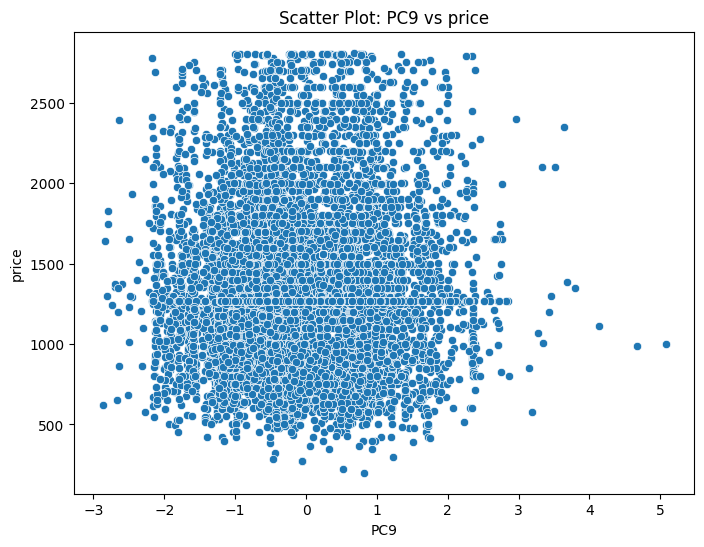

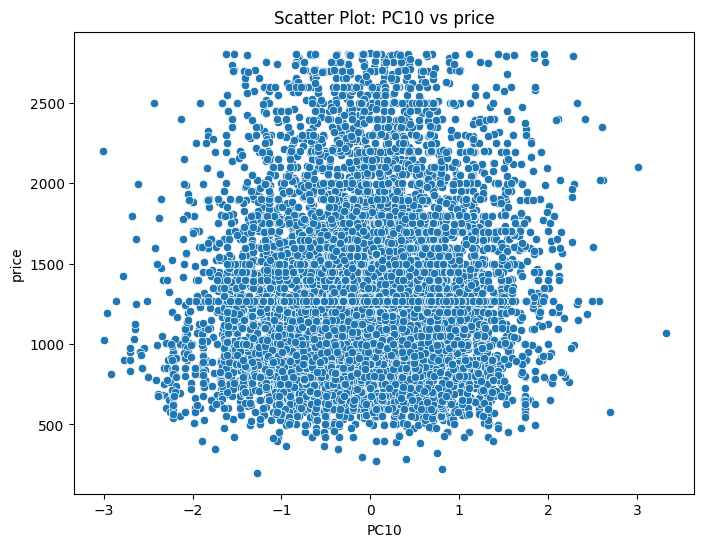

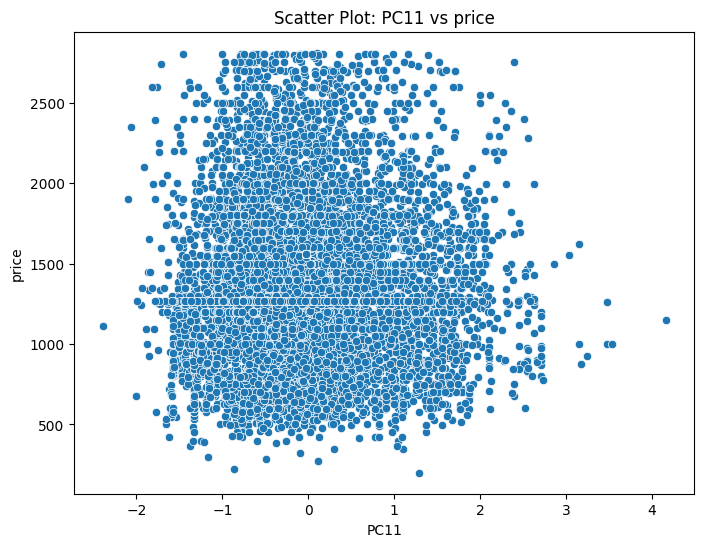


Function to plot boxplots for categorical features vs the target variable



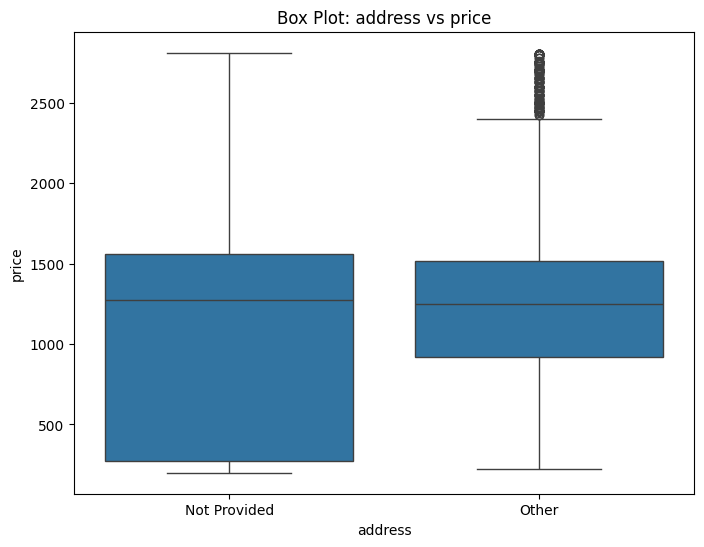

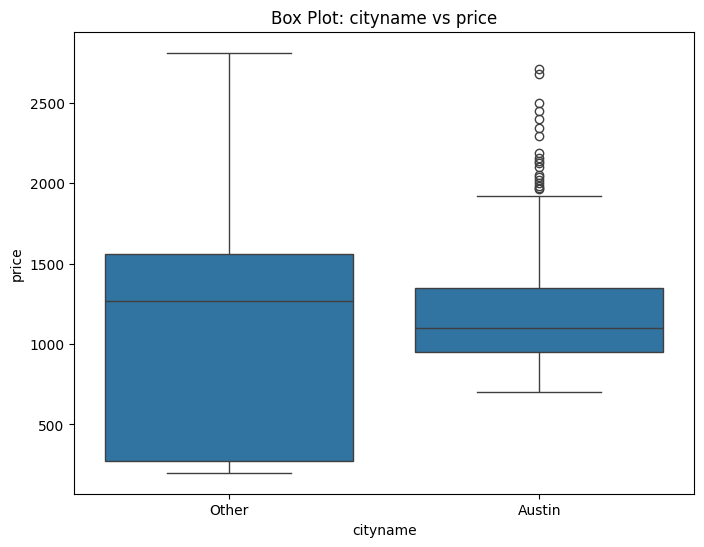

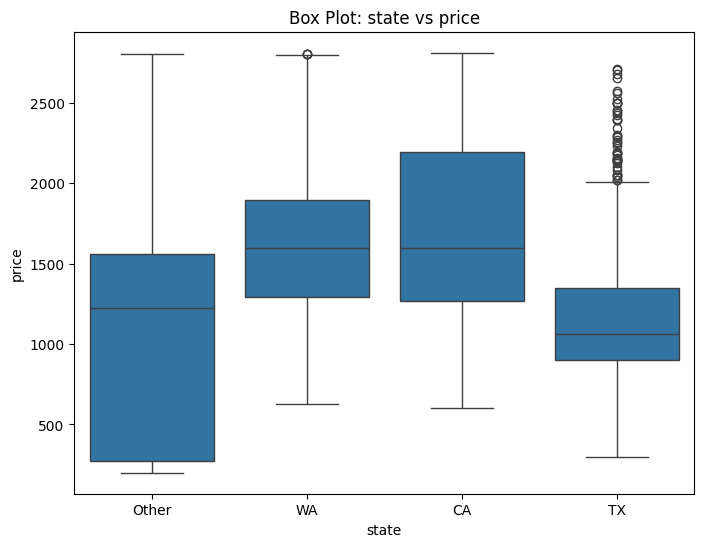

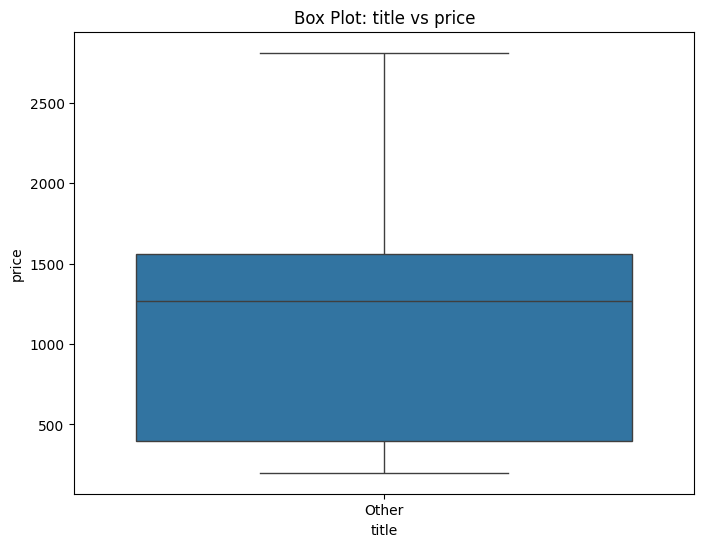

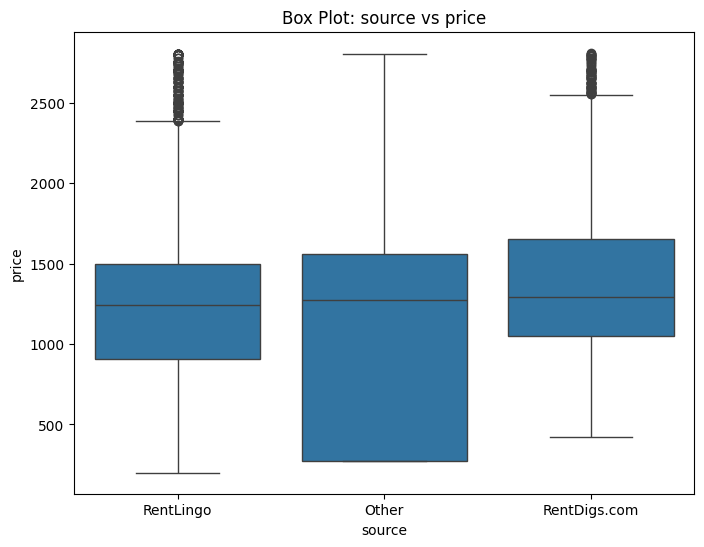

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nFunction to plot scatter plots for numerical features vs the target variable\n")
def plot_target_vs_features(df, target_variable):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        if column != target_variable:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[column], y=df[target_variable])
            plt.title(f'Scatter Plot: {column} vs {target_variable}')
            plt.xlabel(column)
            plt.ylabel(target_variable)
            plt.show()


plot_target_vs_features(df, 'price')

print("\nFunction to plot boxplots for categorical features vs the target variable\n")
def plot_target_vs_categorical(df, target_variable):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column], y=df[target_variable])
        plt.title(f'Box Plot: {column} vs {target_variable}')
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.show()


plot_target_vs_categorical(df, 'price')  # Replace 'price' with your target variable



# Multivariate Analysis


This code generates a heatmap of the correlation matrix for selected numerical features, such as `price`, `square_feet`, `bathrooms`, and `bedrooms`. It visualizes the relationships between these features, highlighting correlations with color intensity and numerical annotations, helping identify strong relationships or multicollinearity.

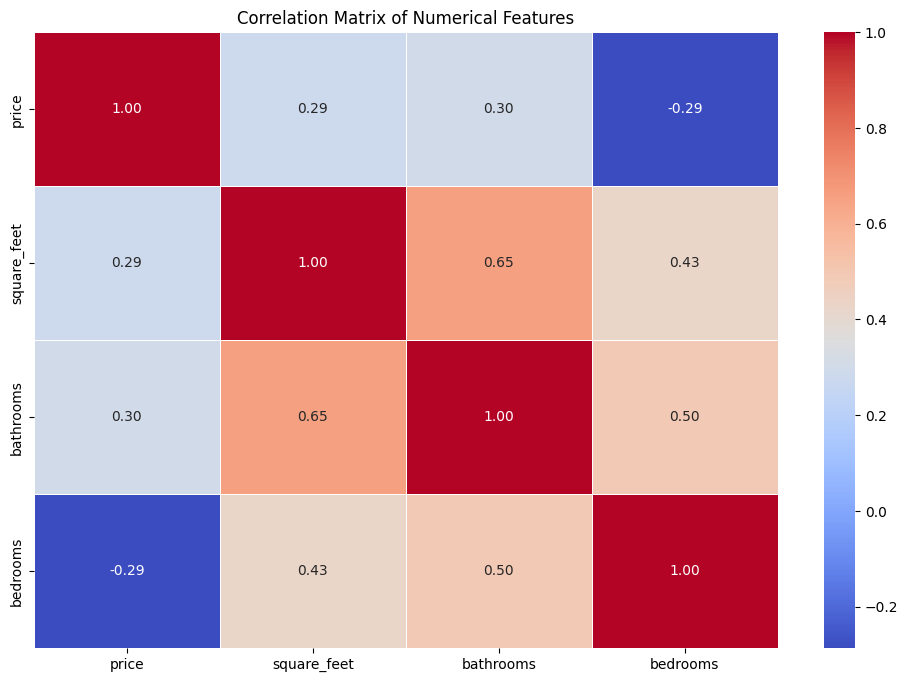

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, numerical_cols):
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Define numerical columns based on your dataset
numerical_cols = ['price', 'square_feet', 'bathrooms', 'bedrooms']
plot_correlation_matrix(df, numerical_cols)


# Descriptive Statistics for Target Column
This code calculates and prints key descriptive statistics for the target column (e.g., price) in the DataFrame, including the mean, mode, median, range, minimum, and maximum values. It also includes error handling to check if the column contains numeric data and ensures it's not empty. This provides essential insights into the distribution and spread of the target variable.

In [ ]:
import pandas as pd
import statistics

# Function to calculate Mean, Mode, Median, Range, Min/Max for the target column (price)
def calculate_statistics(df, target_col):
    try:
        # Extract the target column (price) from the dataframe
        data = df[target_col]

        # Check if the data is empty
        if data.empty:
            raise ValueError("The target column is empty")

        # Check if all values in the target column are numeric
        if not pd.api.types.is_numeric_dtype(data):
            raise ValueError("The target column should only contain numeric values")

        # Calculate Mean
        mean = data.mean()

        # Calculate Mode
        mode = data.mode()[0] if not data.mode().empty else "No unique mode (multiple modes)"

        # Calculate Median
        median = data.median()

        # Calculate Range (Max - Min)
        range_value = data.max() - data.min()

        # Min and Max values
        min_value = data.min()
        max_value = data.max()

        # Print results
        print(f"Mean: {mean}")
        print(f"Mode: {mode}")
        print(f"Median: {median}")
        print(f"Range: {range_value}")
        print(f"Min: {min_value}")
        print(f"Max: {max_value}")

    except ValueError as e:
        print(f"Error: {e}")

# Example usage with a DataFrame
# Assuming 'df' is your DataFrame with a 'price' column

calculate_statistics(df, 'price')


Mean: 852.8380102040817
Mode: 475.0
Median: 625.0
Range: 2610.0
Min: 200.0
Max: 2810.0


# Random Forest with PCA & Classification Metrics
The Random Forest Regressor model is trained using PCA features, with the target variable `price`. PCA components (PC1 to PC10) are used, and some features are removed based on feature importance or correlation. The model's performance is evaluated with regression metrics (MSE, RMSE, MAE, R-squared) and classification metrics after discretizing the target variable (`price`) into categories using `KBinsDiscretizer`. The classification evaluation includes accuracy, precision, recall, F1-score, and a confusion matrix. Feature importance is also assessed to identify the most impactful PCA components for predicting the target.

Mean Squared Error (MSE): 36648.62301487927
Root Mean Squared Error (RMSE): 191.4383008044087
Mean Absolute Error (MAE): 71.54079311591607
R-squared: 0.8559262910605239


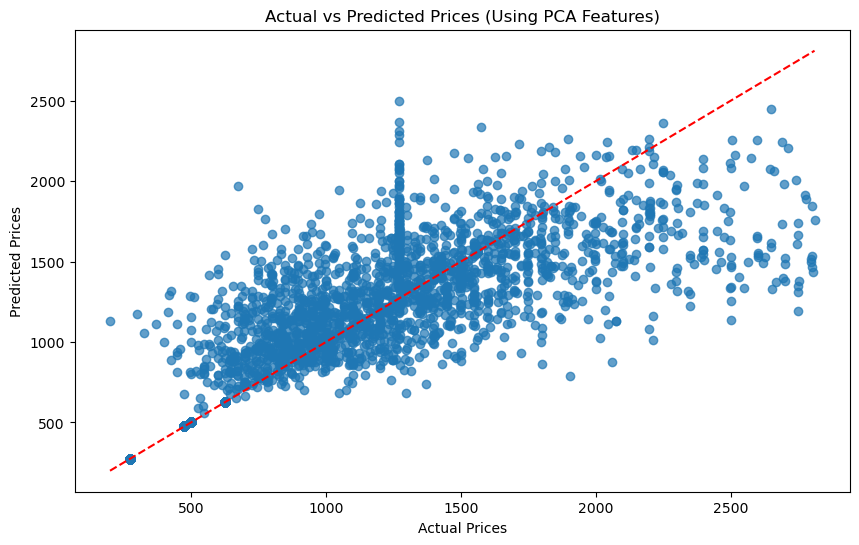

Accuracy: 0.9159684881830686
Precision: 0.9154798052233848
Recall: 0.9159684881830686
F1-score: 0.9124397449608789
Feature Importances:
       Importance
PC8     0.531682
PC2     0.271455
PC6     0.049355
PC10    0.046563
PC9     0.037949
PC1     0.034235
PC4     0.028761


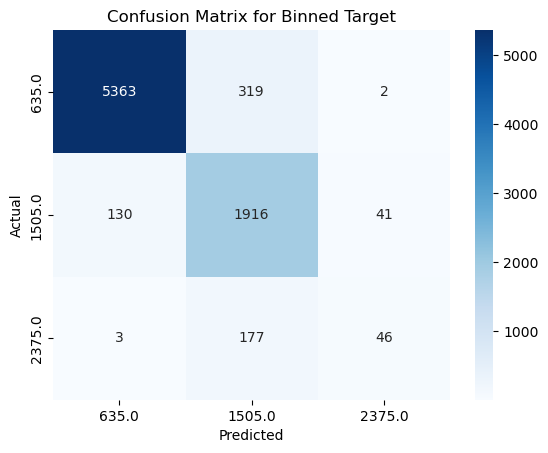

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Assuming df is your DataFrame and 'price' is the target variable
# Select only PCA columns (PC1 to PC10 in this case)
pca_columns = [f'PC{i}' for i in range(1, 11)]  # Assuming you have PC1 to PC10 columns

# Split the data into features (PCA components) and target
X = df[pca_columns]  # Features: Only PCA columns
y = df['price']  # Target: Price

# Features to remove based on feature importance or correlation analysis
features_to_remove = ['PC3', 'PC5', 'PC7']  # Adjust these based on your analysis

# Remove the selected features from the dataset
X_reduced = X.drop(columns=features_to_remove)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model (instead of Linear Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance for regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Using PCA Features)')
plt.show()

# Convert continuous target to categorical for classification metrics
# Using KBinsDiscretizer to bin the target variable into categories
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform',subsample=None)
y_binned = k_bins.fit_transform(y_test.values.reshape(-1, 1)).astype(int).flatten()  # Binned target

# Convert predicted values to the same bins for comparison
y_pred_binned = k_bins.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_binned, y_pred_binned)
precision = precision_score(y_binned, y_pred_binned, average='weighted', zero_division=0)
recall = recall_score(y_binned, y_pred_binned, average='weighted', zero_division=0)
f1 = f1_score(y_binned, y_pred_binned, average='weighted', zero_division=0)

# Print classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Optional: If you want to explore feature importance (for Random Forest)
feature_importance = pd.DataFrame(model.feature_importances_,
                                   index=X_reduced.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importance)

# Confusion Matrix for binned target
conf_matrix = confusion_matrix(y_binned, y_pred_binned)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=k_bins.inverse_transform([[0], [1], [2]]).flatten(), yticklabels=k_bins.inverse_transform([[0], [1], [2]]).flatten())
plt.title('Confusion Matrix for Binned Target')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Question-01 Which features have the highest variance?

In [ ]:
# Calculate variance of each numerical column
variance = df.select_dtypes(include=np.number).var().sort_values(ascending=False)
print("Variance of Numerical Columns:\n", variance)


Variance of Numerical Columns:
 price           361177.328533
square_feet     133887.005050
PC1                  5.877414
PC2                  2.261888
PC3                  1.728015
PC4                  1.465226
PC5                  0.888994
PC6                  0.867725
PC7                  0.643910
PC8                  0.608854
PC9                  0.456913
bedrooms             0.393479
PC10                 0.379026
PC11                 0.334136
bathrooms            0.183918
price_boxcox         0.000369
dtype: float64


# Question-02 What are the correlations among numerical features?

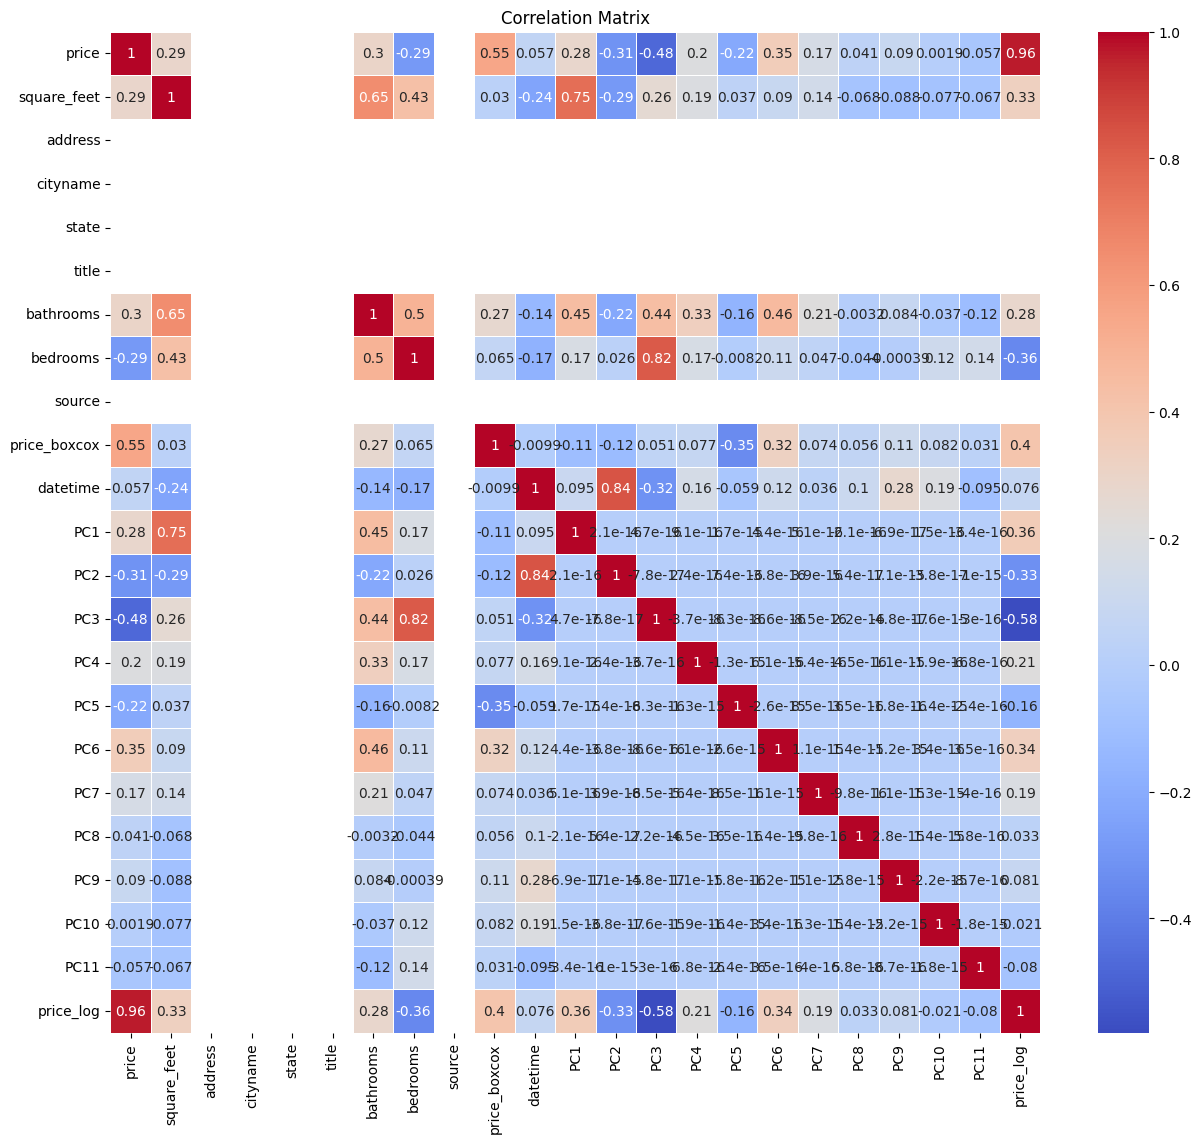

In [ ]:
# Replace 'Not Provided' with NaN for numerical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, errors to NaN

# Calculate correlations and plot a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Question-03 How should categorical features be encoded for model readiness?

In [ ]:
# One-hot encoding for categorical columns (e.g., cityname, state)
df_encoded = pd.get_dummies(df, columns=['cityname', 'state'], drop_first=True)
print("DataFrame after One-Hot Encoding:\n", df_encoded.head())


DataFrame after One-Hot Encoding:
     price  square_feet  address  title  bathrooms  bedrooms  source  \
0   790.0        101.0      NaN    NaN        1.0       0.0     NaN   
1   425.0        106.0      NaN    NaN        1.0       1.0     NaN   
2  1390.0        107.0      NaN    NaN        1.0       0.0     NaN   
3   925.0        116.0      NaN    NaN        1.0       0.0     NaN   
4   880.0        125.0      NaN    NaN        1.0       0.0     NaN   

   price_boxcox            datetime       PC1  ...       PC3       PC4  \
0      2.370940 2019-12-26 11:23:35  2.042148  ... -0.000594  0.886785   
1      2.402918 2019-12-22 12:17:43  3.447507  ... -1.335204  0.832816   
2      2.408357 2019-12-26 11:23:30  2.043715  ...  0.000550  0.883903   
3      2.382231 2019-12-18 11:15:43  4.447707  ... -1.577478 -0.595199   
4      2.378737 2019-12-26 11:23:21  2.043593  ...  0.001744  0.882289   

        PC5       PC6       PC7       PC8       PC9      PC10      PC11  \
0  1.460632  0.306

# Question-04 How does 'square_feet' vary with 'price'?

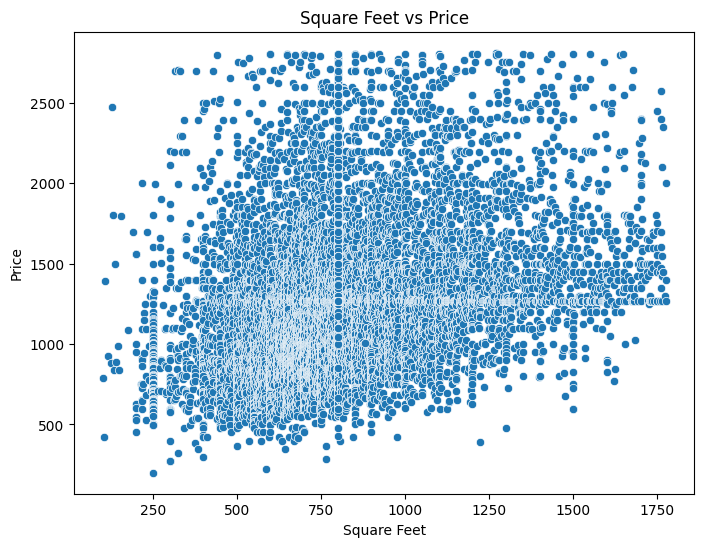

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['square_feet'], y=df['price'])
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()


# Question-05  Which features have skewed distributions that might require transformation?

In [ ]:
# Checking skewness of numerical columns
skewness = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
print("Skewness of Numerical Columns:\n", skewness)

# Log transform example (on columns with high skewness)
# Skewed columns example (e.g., 'price' if it’s skewed)
df['price_log'] = np.log1p(df['price'])


Skewness of Numerical Columns:
 bathrooms       2.455797
square_feet     0.984634
PC8             0.685287
PC11            0.682181
PC6             0.586531
bedrooms        0.416789
PC1             0.378191
PC3             0.219206
PC9             0.072792
price          -0.025328
PC7            -0.143844
PC5            -0.309577
PC10           -0.397908
price_boxcox   -0.448839
PC4            -1.442995
PC2            -1.918804
address              NaN
cityname             NaN
state                NaN
title                NaN
source               NaN
dtype: float64
